## Graphing 

#1 In this notebook, I import the pickle Matplotlib objects of the graph results of both the NDE training, pre and post as well as the HMC 

In [6]:
import matplotlib 
import matplotlib as plt
import matplotlib.pyplot as plt

## Training Set 1 

In [84]:
import pickle
file_path = 'C:/Users/danic/Thesis/Data/Training_Set_1_Val_visualization.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)
print(data)


Figure(2700x6000)


In [85]:
# Load the figure
with open(file_path, 'rb') as file:
    loaded_figure = pickle.load(file)

In [86]:
import matplotlib.pyplot as plt

# Display the loaded figure
loaded_figure.canvas.draw()  # Redraw the canvas to update it
plt.show()


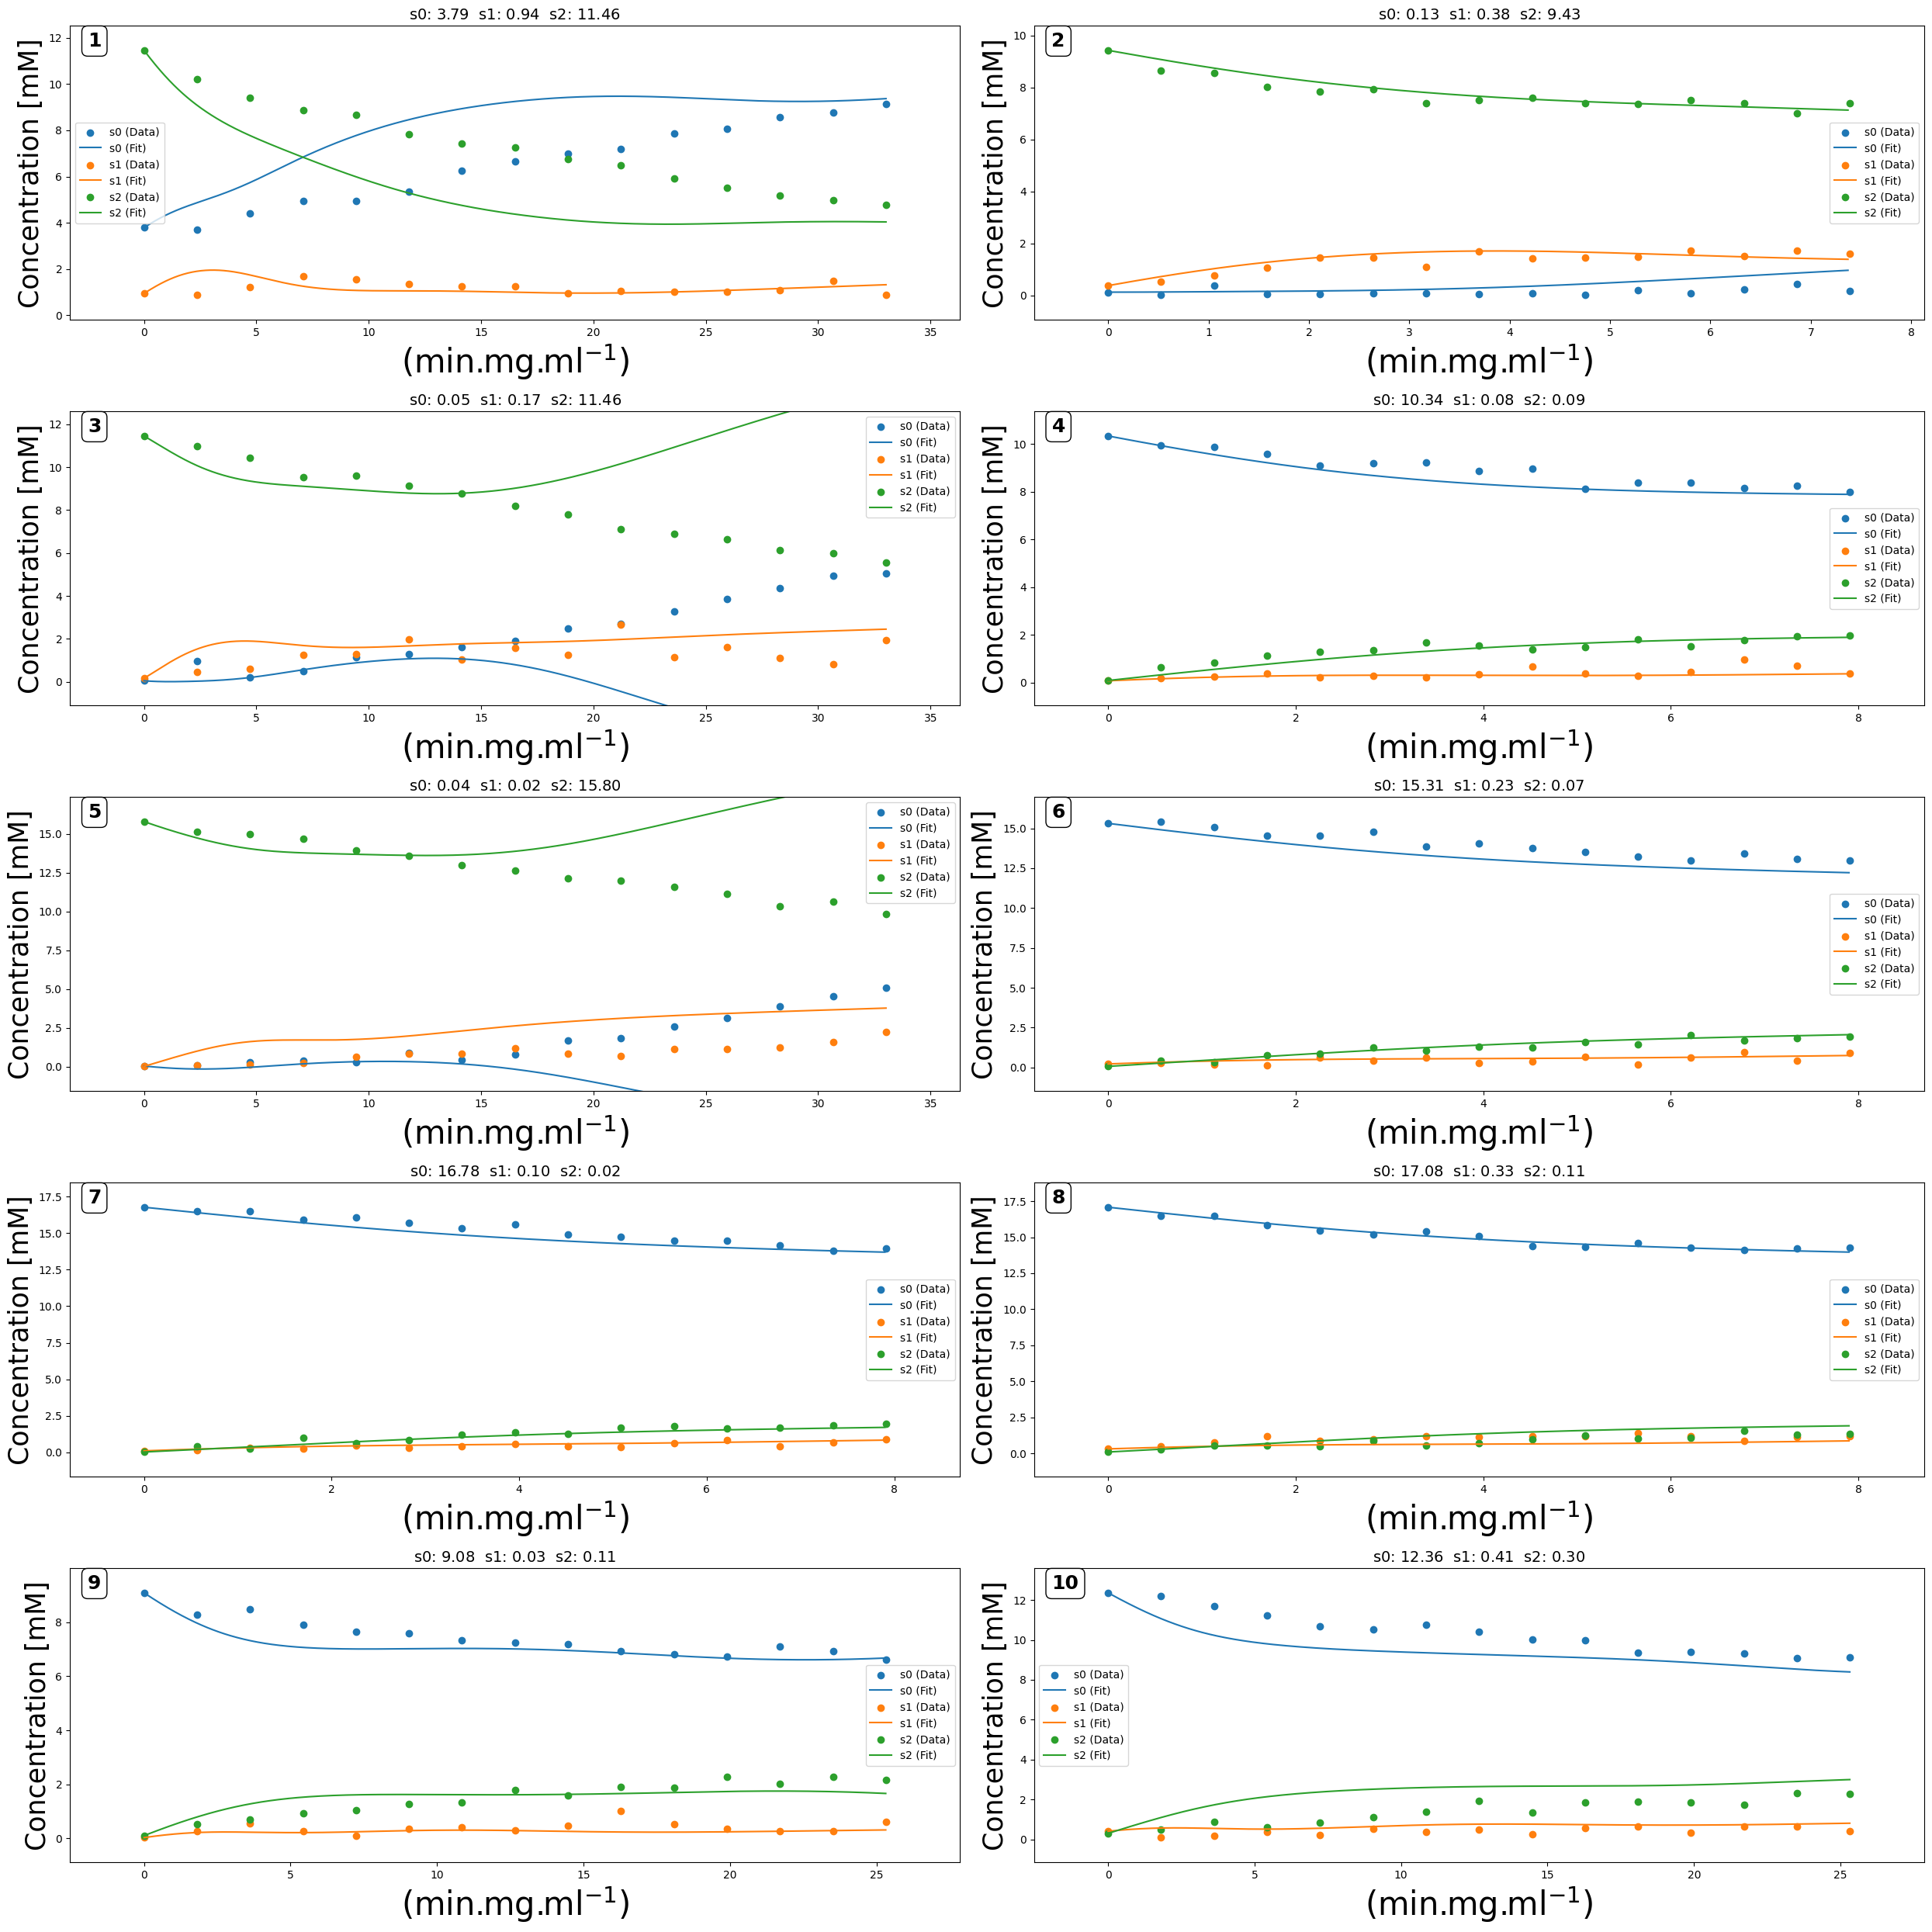

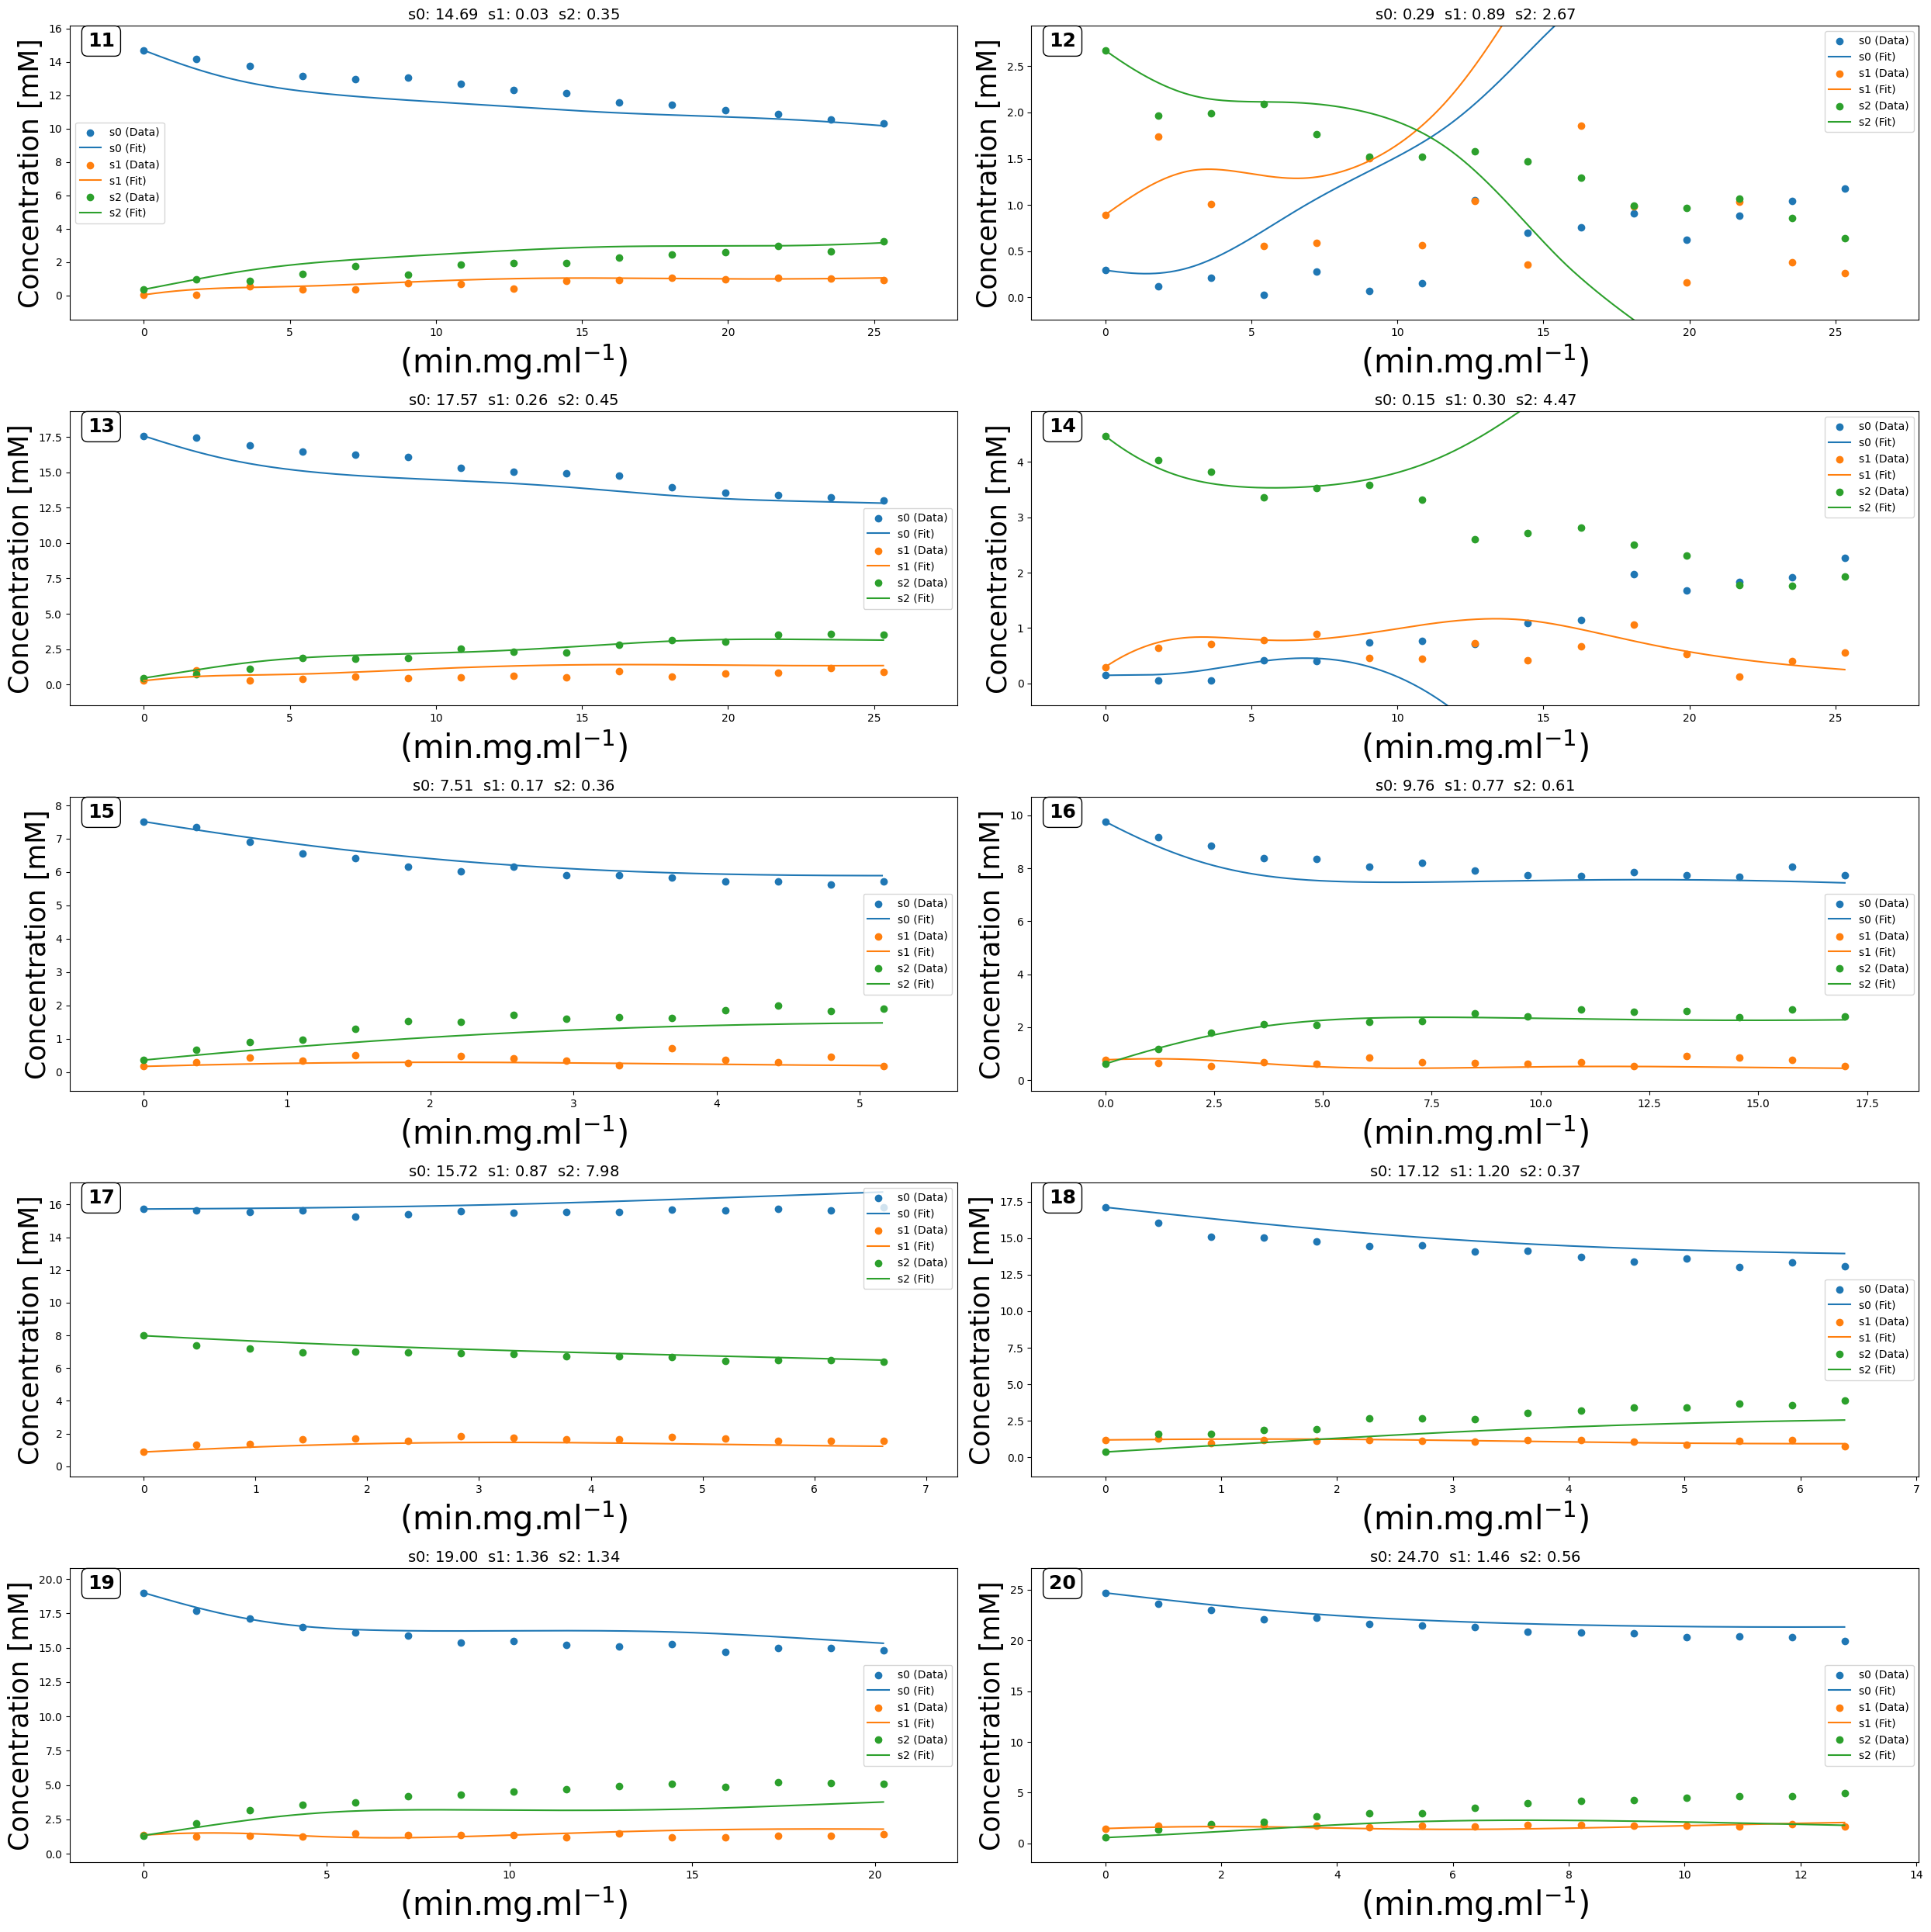

In [87]:
import matplotlib.pyplot as plt

# Number of axes
num_axes = len(loaded_figure.axes)

# Split into two groups
split_index = 10  # Number of graphs per figure
groups = [loaded_figure.axes[:split_index], loaded_figure.axes[split_index:]]

# Function to create and save a figure for a group of graphs
def create_figure(graphs, filename, start_index):
    num_axes = len(graphs)

    # Skip if there are no graphs to plot
    if num_axes == 0:
        print(f"No graphs to plot in {filename}.")
        return

    cols = 2
    rows = (num_axes // cols) + (num_axes % cols > 0)

    # Create a larger figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(25, rows * 5))  # Adjusted figsize
    axes = axes.flatten()  # Flatten to easily iterate over

    # Iterate over the loaded axes and the new subplots
    for i, (loaded_ax, new_ax) in enumerate(zip(graphs, axes)):
        # Initialize limits based only on the data points
        x_min, x_max = float('inf'), float('-inf')
        y_min, y_max = float('inf'), float('-inf')

        for line in loaded_ax.get_lines():
            label = line.get_label()
            x_data = line.get_xdata()
            y_data = line.get_ydata()

            if "Data" in label:
                # Scatter for data
                new_ax.scatter(x_data, y_data, label=label)
                # Update axis limits based on data points
                x_min = min(x_min, min(x_data))
                x_max = max(x_max, max(x_data))
                y_min = min(y_min, min(y_data))
                y_max = max(y_max, max(y_data))
            elif "Fit" in label:
                # Trim the fit line to only the range of the data
                valid_fit = (x_data >= x_min) & (x_data <= x_max)
                new_ax.plot(x_data[valid_fit], y_data[valid_fit], label=label)

        # Add subplot numbering in the top-left corner of each individual graph
        new_ax.text(
            0.02, 0.98, f"{start_index + i + 1}", transform=new_ax.transAxes,
            fontsize=18, fontweight='bold', va='top', ha='left',
            color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
        )

        # Set titles, labels, and legends
        new_ax.set_title(loaded_ax.get_title(), fontsize=14)
        new_ax.set_xlabel("(min.mg.ml$^{-1}$)", fontsize=30)  # Superscript for ^-1
        new_ax.set_ylabel("Concentration [mM]", fontsize=25)
        new_ax.legend(loc='best', fontsize=10)

        # Dynamically adjust x and y limits with a small margin
        margin_x = 0.1 * (x_max - x_min)
        margin_y = 0.1 * (y_max - y_min)
        if x_min != float('inf') and y_min != float('inf'):  # Ensure valid limits
            new_ax.set_xlim(x_min - margin_x, x_max + margin_x)
            new_ax.set_ylim(y_min - margin_y, y_max + margin_y)
        else:
            print(f"Skipping subplot {start_index + i + 1} due to invalid limits.")

    # Hide unused subplots
    for ax in axes[num_axes:]:
        ax.axis('off')

    # Adjust layout and spacing
    plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust spacing between subplots

    # Save the figure to a file
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches="tight")  # Save with specific name

    # Show the figure
    plt.show()


# Create and save the first figure
create_figure(groups[0], "Training Set 1 Visualization Val Part 1.png", start_index=0)

# Create and save the second figure
create_figure(groups[1], "Training Set 1 Visualization Val Part 2.png", start_index=10)

## Training Set 2 

In [22]:
import pickle
file_path = 'C:/Users/danic/Thesis/Data/Training_Set_2_VAL_visualization.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)
print(data)

Figure(2700x6000)


In [23]:
# Load the figure
with open(file_path, 'rb') as file:
    loaded_figure = pickle.load(file)

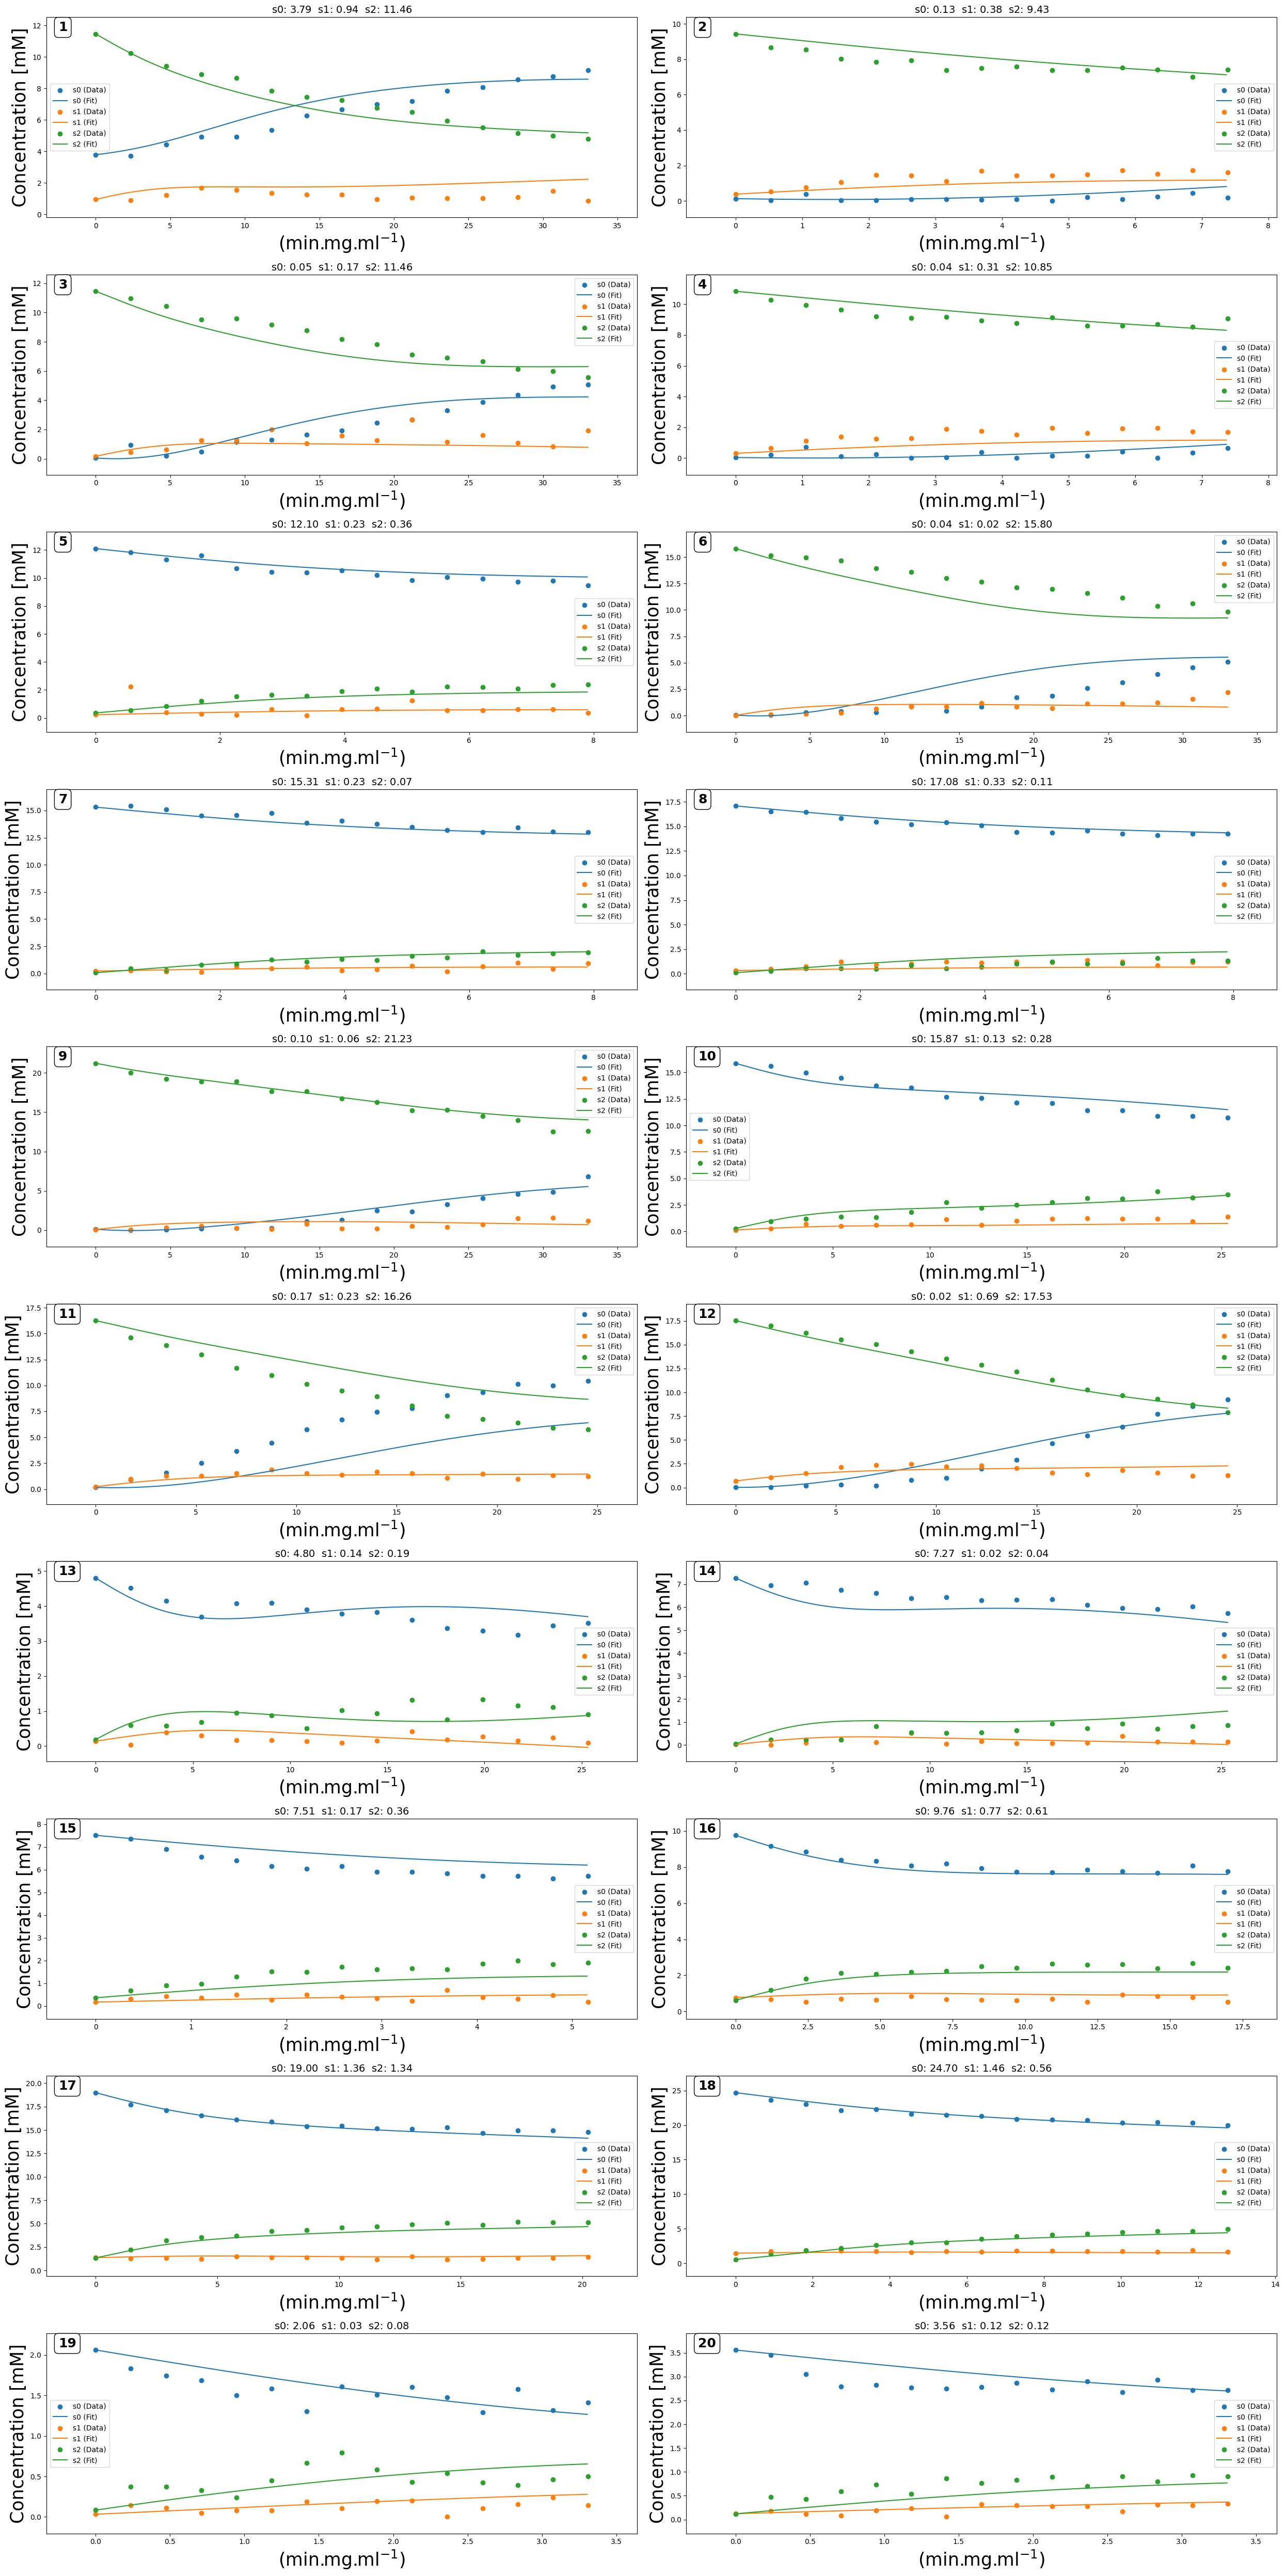

In [35]:
import matplotlib.pyplot as plt

# Number of axes
num_axes = len(loaded_figure.axes)

# Adjust the grid size (2 columns for larger plots)
cols = 2
rows = (num_axes // cols) + (num_axes % cols > 0)

# Create a larger figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(25, rows * 5))  # Adjusted figsize
axes = axes.flatten()  # Flatten to easily iterate over

# Iterate over the loaded axes and the new subplots
for i, (loaded_ax, new_ax) in enumerate(zip(loaded_figure.axes, axes)):
    # Initialize limits based only on the data points
    x_min, x_max = float('inf'), float('-inf')
    y_min, y_max = float('inf'), float('-inf')

    for line in loaded_ax.get_lines():
        label = line.get_label()
        x_data = line.get_xdata()
        y_data = line.get_ydata()

        if "Data" in label:
            # Scatter for data
            new_ax.scatter(x_data, y_data, label=label)
            # Update axis limits based on data points
            x_min = min(x_min, min(x_data))
            x_max = max(x_max, max(x_data))
            y_min = min(y_min, min(y_data))
            y_max = max(y_max, max(y_data))
        elif "Fit" in label:
            # Trim the fit line to only the range of the data
            valid_fit = (x_data >= x_min) & (x_data <= x_max)
            new_ax.plot(x_data[valid_fit], y_data[valid_fit], label=label)

    # Add subplot numbering in the top-left corner of each individual graph
    new_ax.text(
        0.02, 0.98, f"{i + 1}", transform=new_ax.transAxes, 
        fontsize=18, fontweight='bold', va='top', ha='left', 
        color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )

    # Set titles, labels, and legends
    new_ax.set_title(loaded_ax.get_title(), fontsize=14)
    new_ax.set_xlabel("(min.mg.ml$^{-1}$)", fontsize=25)  # Superscript for ^-1
    new_ax.set_ylabel("Concentration [mM]", fontsize=25)
    new_ax.legend(loc='best', fontsize=10)

    # Dynamically adjust x and y limits with a small margin
    margin_x = 0.1 * (x_max - x_min)
    margin_y = 0.1 * (y_max - y_min)
    new_ax.set_xlim(x_min - margin_x, x_max + margin_x)
    new_ax.set_ylim(y_min - margin_y, y_max + margin_y)

# Hide unused subplots
for ax in axes[num_axes:]:
    ax.axis('off')

# Adjust layout and spacing
plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust spacing between subplots

# Save the figure to a file
plt.tight_layout()
plt.savefig("Training Set 2 Visualization Val.png", dpi=300, bbox_inches="tight")  # Save with specific name

# Show the figure
plt.show()


In [36]:
import os
print(os.getcwd())


C:\Users\danic\Thesis


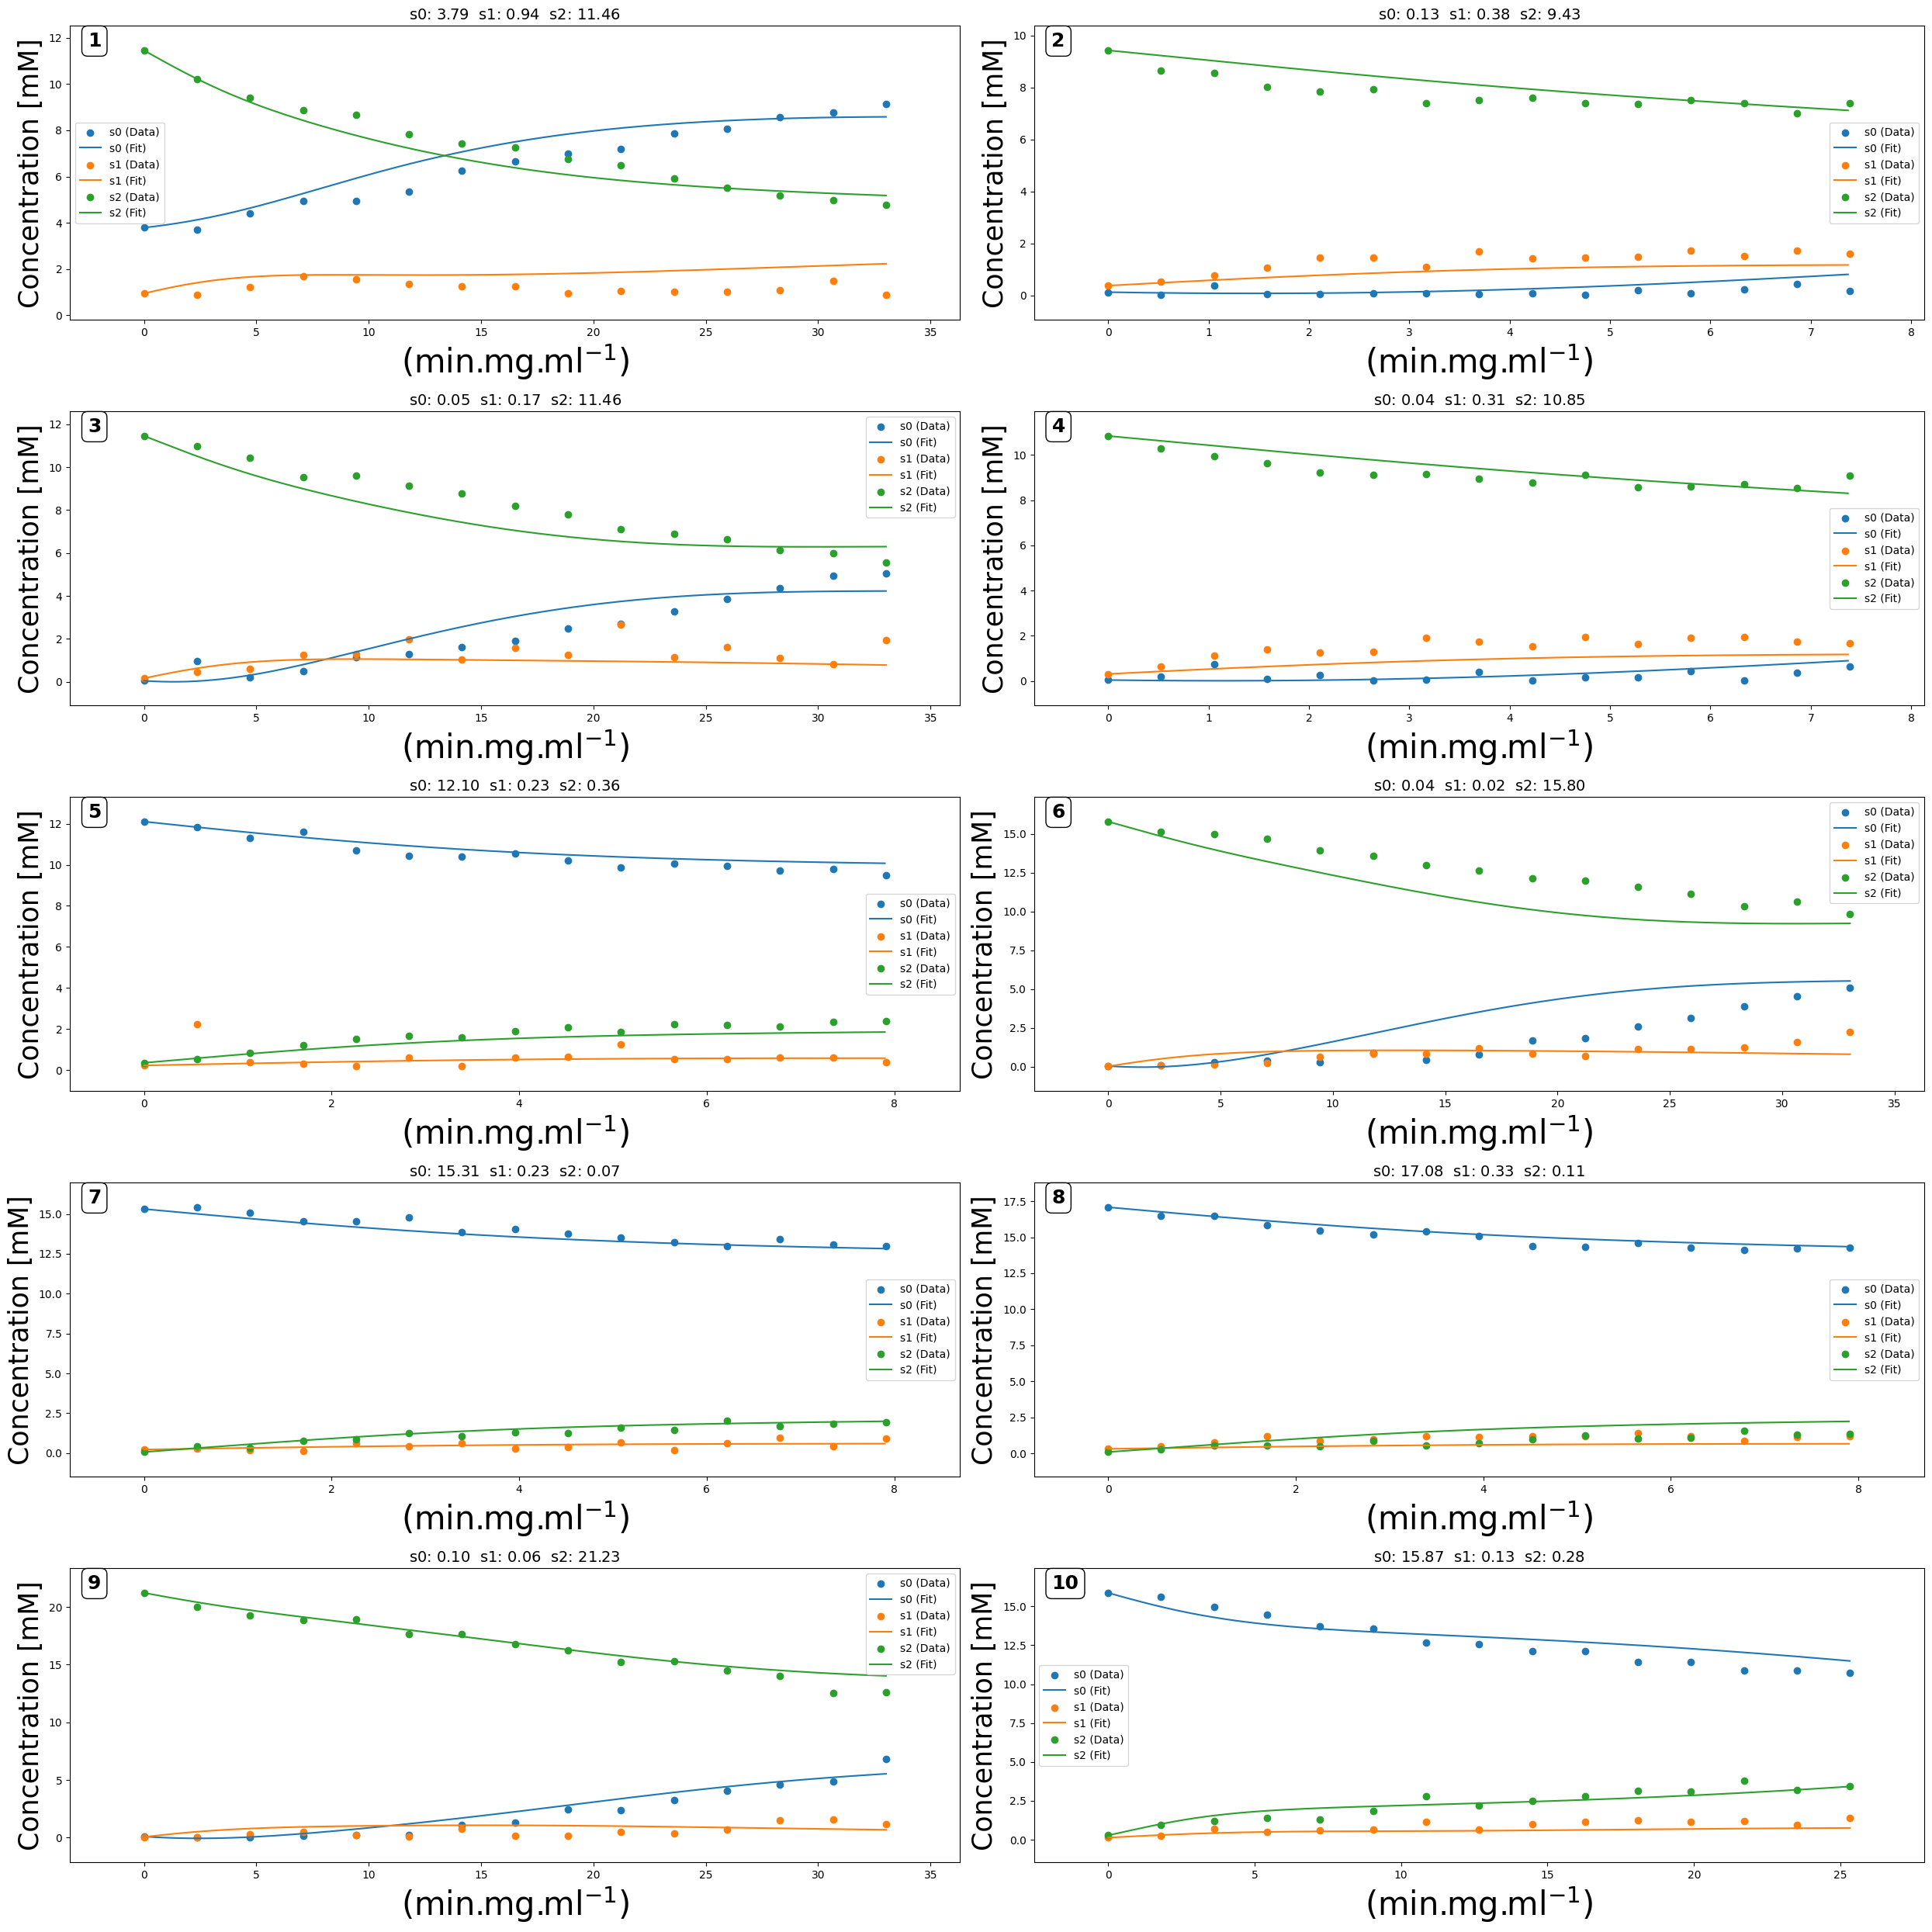

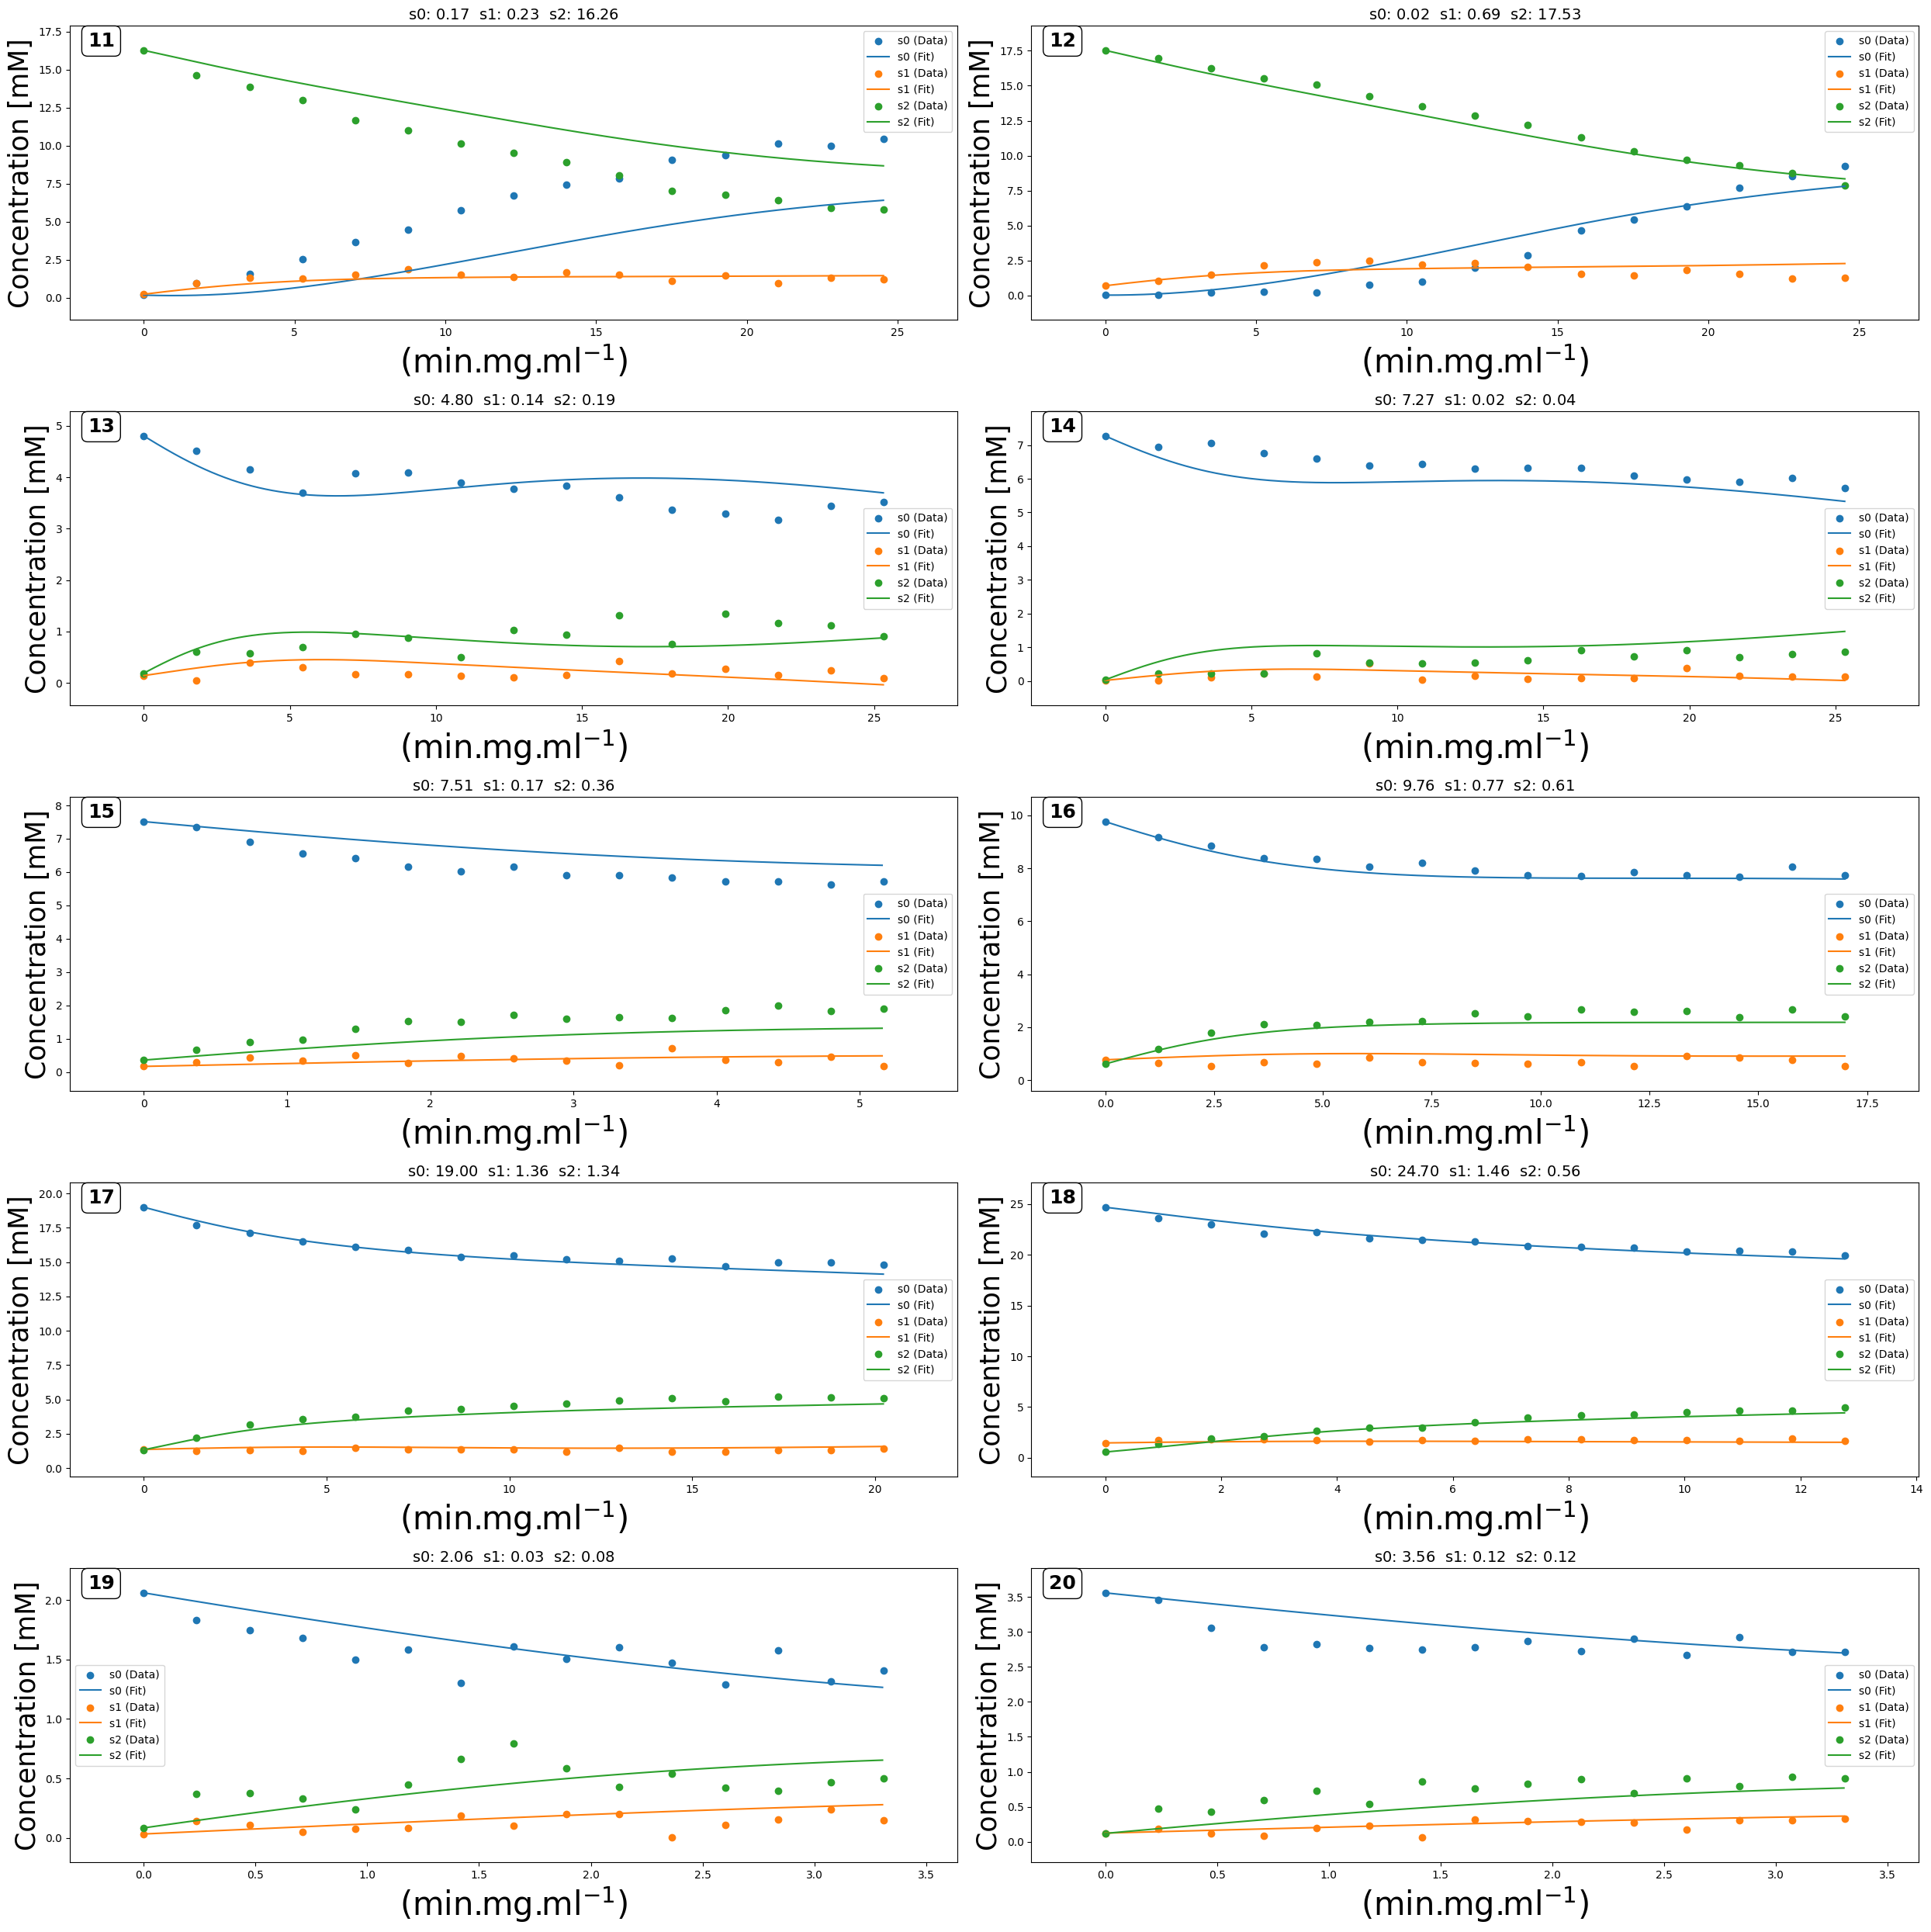

In [40]:
import matplotlib.pyplot as plt

# Number of axes
num_axes = len(loaded_figure.axes)

# Split into two groups
split_index = 10  # Number of graphs per figure
groups = [loaded_figure.axes[:split_index], loaded_figure.axes[split_index:]]

# Function to create and save a figure for a group of graphs
def create_figure(graphs, filename, start_index):
    num_axes = len(graphs)
    cols = 2
    rows = (num_axes // cols) + (num_axes % cols > 0)

    # Create a larger figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(25, rows * 5))  # Adjusted figsize
    axes = axes.flatten()  # Flatten to easily iterate over

    # Iterate over the loaded axes and the new subplots
    for i, (loaded_ax, new_ax) in enumerate(zip(graphs, axes)):
        # Initialize limits based only on the data points
        x_min, x_max = float('inf'), float('-inf')
        y_min, y_max = float('inf'), float('-inf')

        for line in loaded_ax.get_lines():
            label = line.get_label()
            x_data = line.get_xdata()
            y_data = line.get_ydata()

            if "Data" in label:
                # Scatter for data
                new_ax.scatter(x_data, y_data, label=label)
                # Update axis limits based on data points
                x_min = min(x_min, min(x_data))
                x_max = max(x_max, max(x_data))
                y_min = min(y_min, min(y_data))
                y_max = max(y_max, max(y_data))
            elif "Fit" in label:
                # Trim the fit line to only the range of the data
                valid_fit = (x_data >= x_min) & (x_data <= x_max)
                new_ax.plot(x_data[valid_fit], y_data[valid_fit], label=label)

        # Add subplot numbering in the top-left corner of each individual graph
        new_ax.text(
            0.02, 0.98, f"{start_index + i + 1}", transform=new_ax.transAxes,
            fontsize=18, fontweight='bold', va='top', ha='left',
            color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
        )

        # Set titles, labels, and legends
        new_ax.set_title(loaded_ax.get_title(), fontsize=14)
        new_ax.set_xlabel("(min.mg.ml$^{-1}$)", fontsize=30)  # Superscript for ^-1
        new_ax.set_ylabel("Concentration [mM]", fontsize=25)
        new_ax.legend(loc='best', fontsize=10)

        # Dynamically adjust x and y limits with a small margin
        margin_x = 0.1 * (x_max - x_min)
        margin_y = 0.1 * (y_max - y_min)
        new_ax.set_xlim(x_min - margin_x, x_max + margin_x)
        new_ax.set_ylim(y_min - margin_y, y_max + margin_y)

    # Hide unused subplots
    for ax in axes[num_axes:]:
        ax.axis('off')

    # Adjust layout and spacing
    plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust spacing between subplots

    # Save the figure to a file
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches="tight")  # Save with specific name

    # Show the figure
    plt.show()


# Create and save the first figure
create_figure(groups[0], "Training Set 2 Visualization Val Part 1.png", start_index=0)

# Create and save the second figure
create_figure(groups[1], "Training Set 2 Visualization Val Part 2.png", start_index=10)


## Training Set 3

#Pretraining

In [45]:
import pickle
file_path = 'C:/Users/danic/Thesis/Data/Pretaining_Set_3_visualization.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)
print(data)

Figure(7200x2400)


In [46]:
# Load the figure
with open(file_path, 'rb') as file:
    loaded_figure = pickle.load(file)

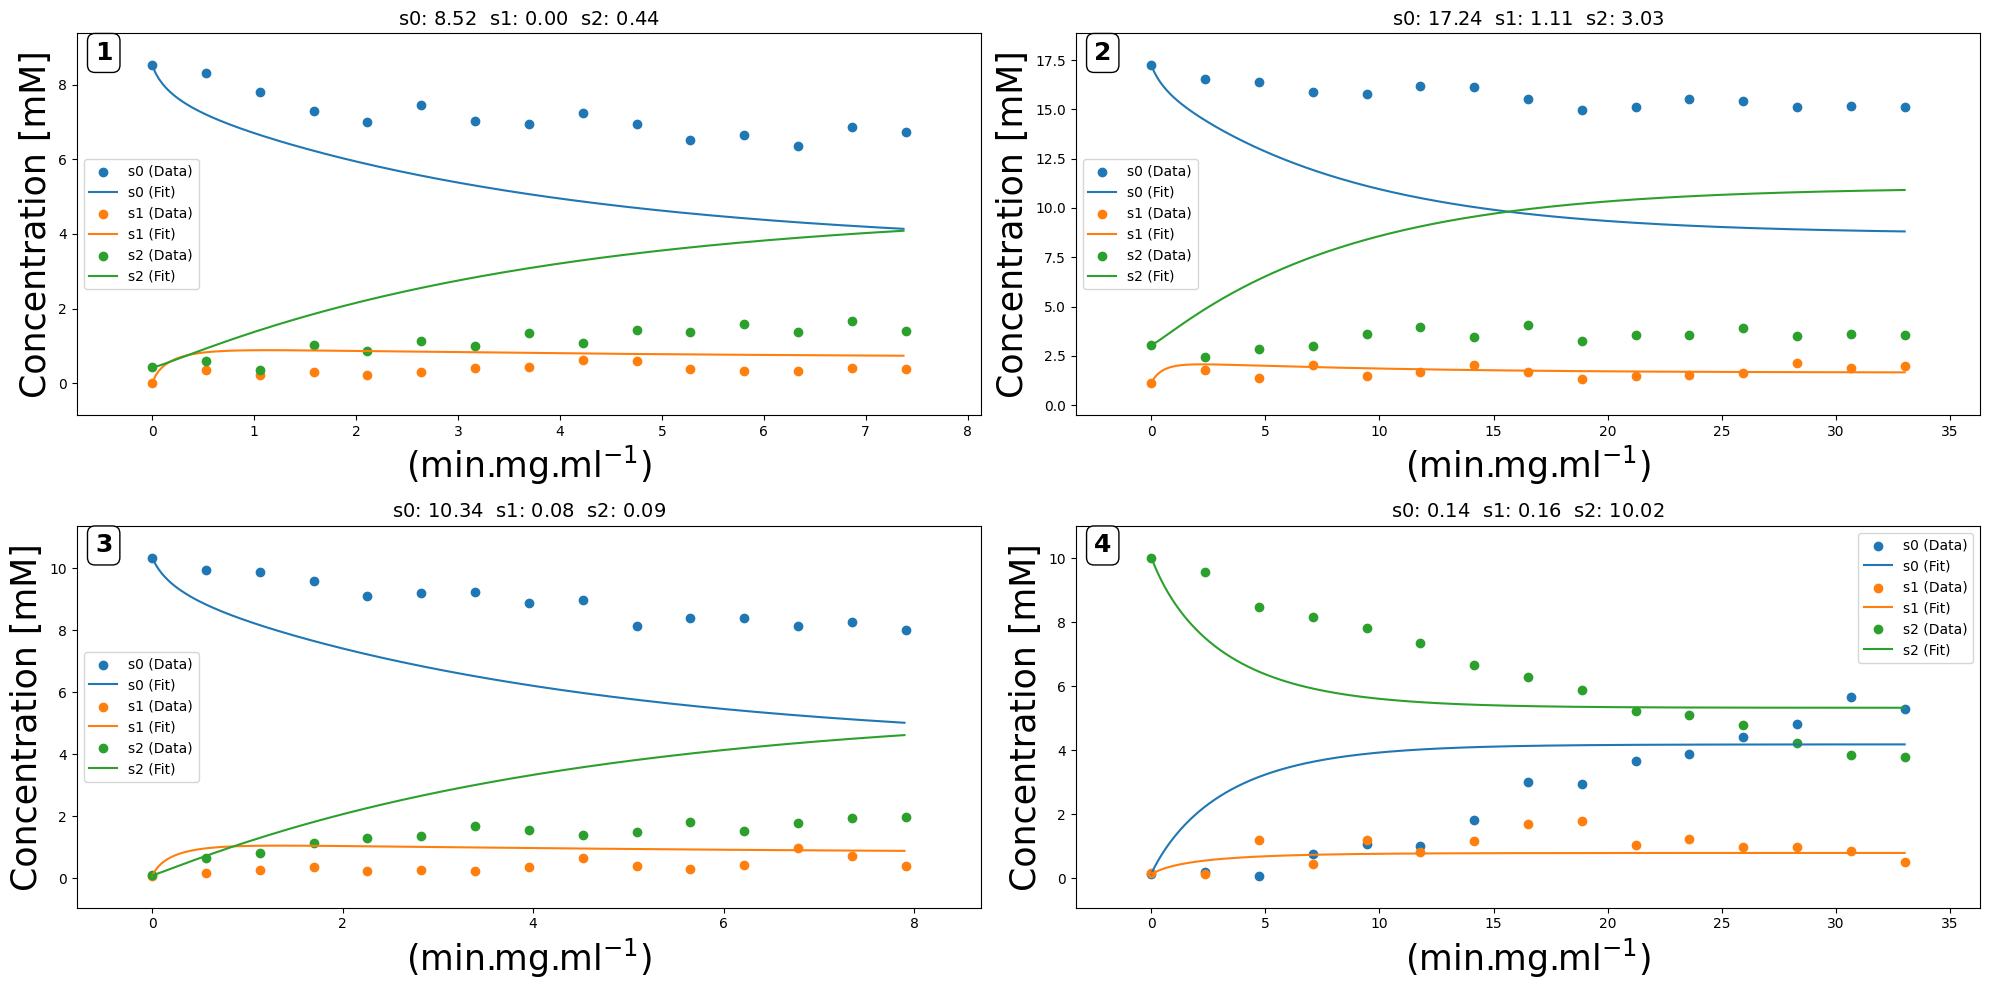

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Function to sanitize data by removing NaN or Inf values
def sanitize_data(x, y):
    valid_indices = ~np.isnan(x) & ~np.isnan(y) & ~np.isinf(x) & ~np.isinf(y)
    return x[valid_indices], y[valid_indices]

# Function to create and save a figure for the first 4 graphs
def create_figure(graphs, filename):
    num_axes = len(graphs)
    cols = 2
    rows = (num_axes // cols) + (num_axes % cols > 0)

    # Create a larger figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))  # Adjusted figsize
    axes = axes.flatten()  # Flatten to easily iterate over

    # Iterate over the loaded axes and the new subplots
    for i, (loaded_ax, new_ax) in enumerate(zip(graphs, axes)):
        # Initialize limits based only on the data points
        x_min, x_max = float('inf'), float('-inf')
        y_min, y_max = float('inf'), float('-inf')

        for line in loaded_ax.get_lines():
            label = line.get_label()
            x_data = line.get_xdata()
            y_data = line.get_ydata()

            # Sanitize data
            x_data, y_data = sanitize_data(np.array(x_data), np.array(y_data))

            if "Data" in label:
                # Scatter for data
                new_ax.scatter(x_data, y_data, label=label)
                # Update axis limits based on data points
                if len(x_data) > 0 and len(y_data) > 0:
                    x_min = min(x_min, min(x_data))
                    x_max = max(x_max, max(x_data))
                    y_min = min(y_min, min(y_data))
                    y_max = max(y_max, max(y_data))
            elif "Fit" in label:
                # Trim the fit line to only the range of the data
                valid_fit = (x_data >= x_min) & (x_data <= x_max)
                if valid_fit.any():  # Ensure valid points exist
                    new_ax.plot(x_data[valid_fit], y_data[valid_fit], label=label)

        # Add subplot numbering in the top-left corner of each individual graph
        new_ax.text(
            0.02, 0.98, f"{i + 1}", transform=new_ax.transAxes,
            fontsize=18, fontweight='bold', va='top', ha='left',
            color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
        )

        # Set titles, labels, and legends
        new_ax.set_title(loaded_ax.get_title(), fontsize=14)
        new_ax.set_xlabel("(min.mg.ml$^{-1}$)", fontsize=25)  # Superscript for ^-1
        new_ax.set_ylabel("Concentration [mM]", fontsize=25)
        new_ax.legend(loc='best', fontsize=10)

        # Dynamically adjust x and y limits with a small margin
        if np.isfinite(x_min) and np.isfinite(x_max):
            margin_x = 0.1 * (x_max - x_min)
            new_ax.set_xlim(x_min - margin_x, x_max + margin_x)
        if np.isfinite(y_min) and np.isfinite(y_max):
            margin_y = 0.1 * (y_max - y_min)
            new_ax.set_ylim(y_min - margin_y, y_max + margin_y)

    # Hide unused subplots
    for ax in axes[num_axes:]:
        ax.axis('off')

    # Adjust layout and spacing
    plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust spacing between subplots

    # Save the figure to a file
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches="tight")  # Save with specific name

    # Show the figure
    plt.show()


# Select the first 4 graphs
graphs_to_show = loaded_figure.axes[:4]

# Create and save the figure
create_figure(graphs_to_show, "Pre-Training Set 3.png")


#Training 

In [51]:
import pickle
file_path = 'C:/Users/danic/Thesis/Data/Training_Set_3_Val_visualization.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)
print(data)

Figure(24000x2400)


In [52]:
# Load the figure
with open(file_path, 'rb') as file:
    loaded_figure = pickle.load(file)

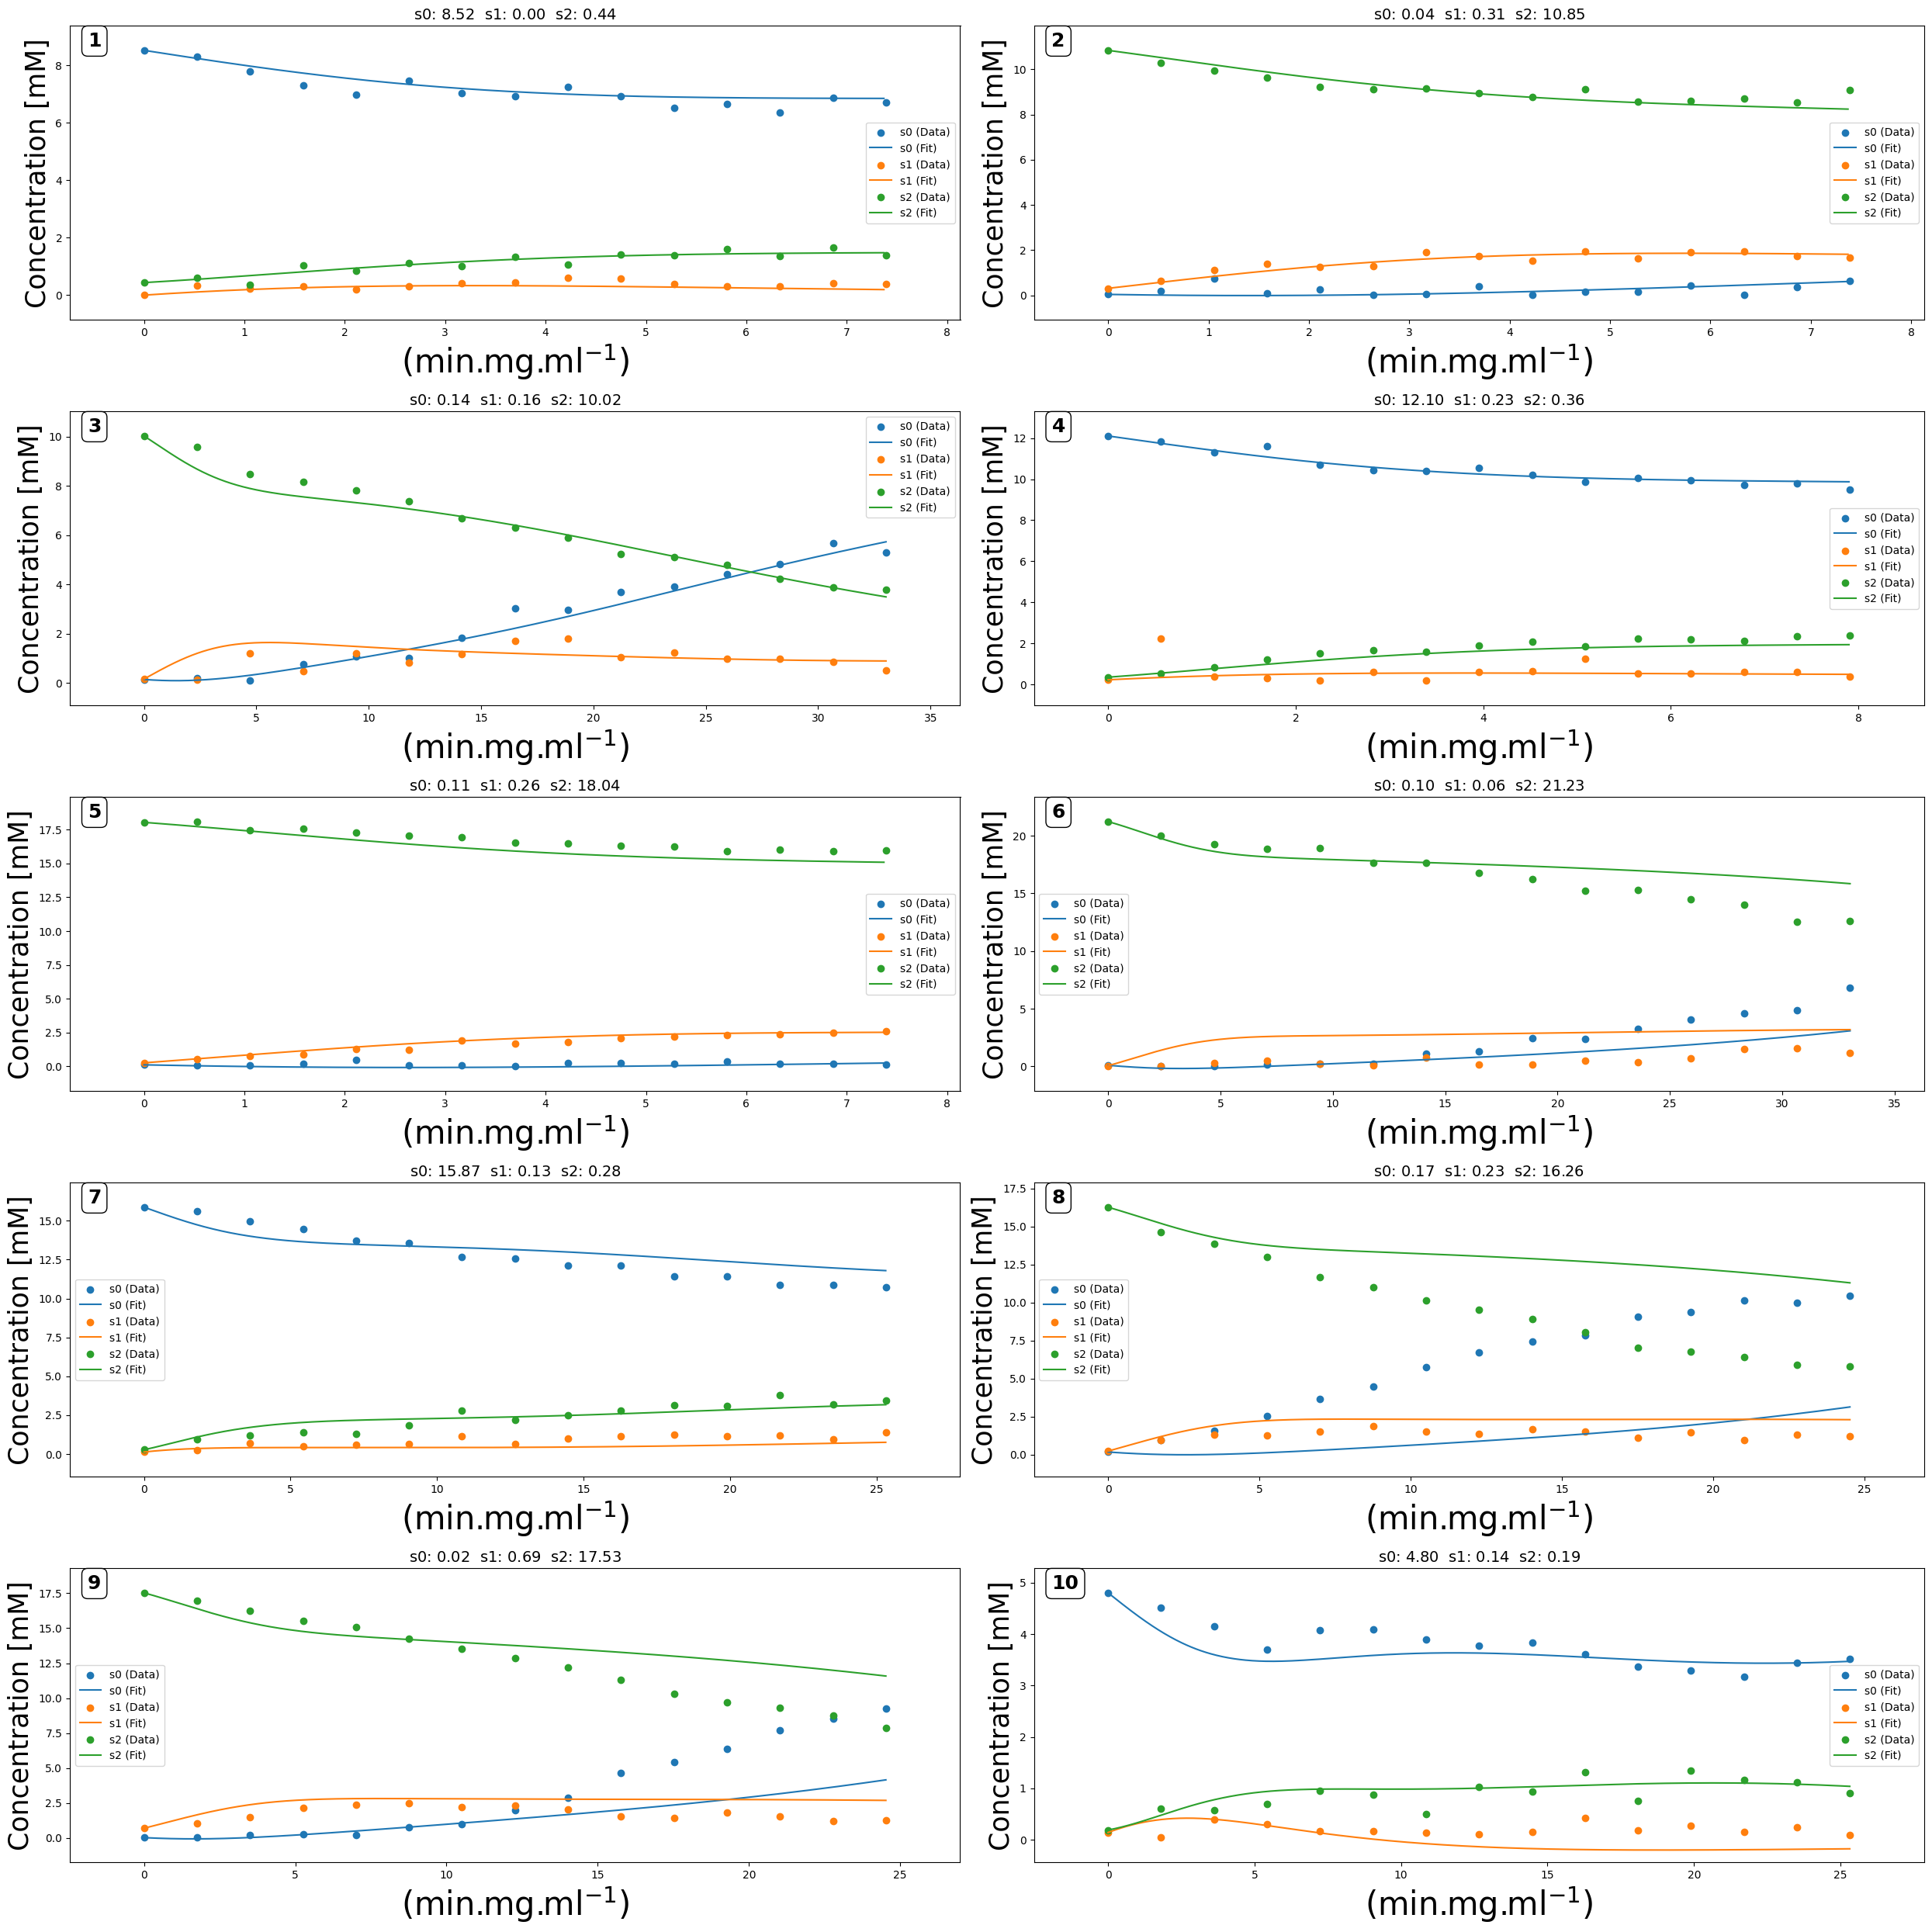

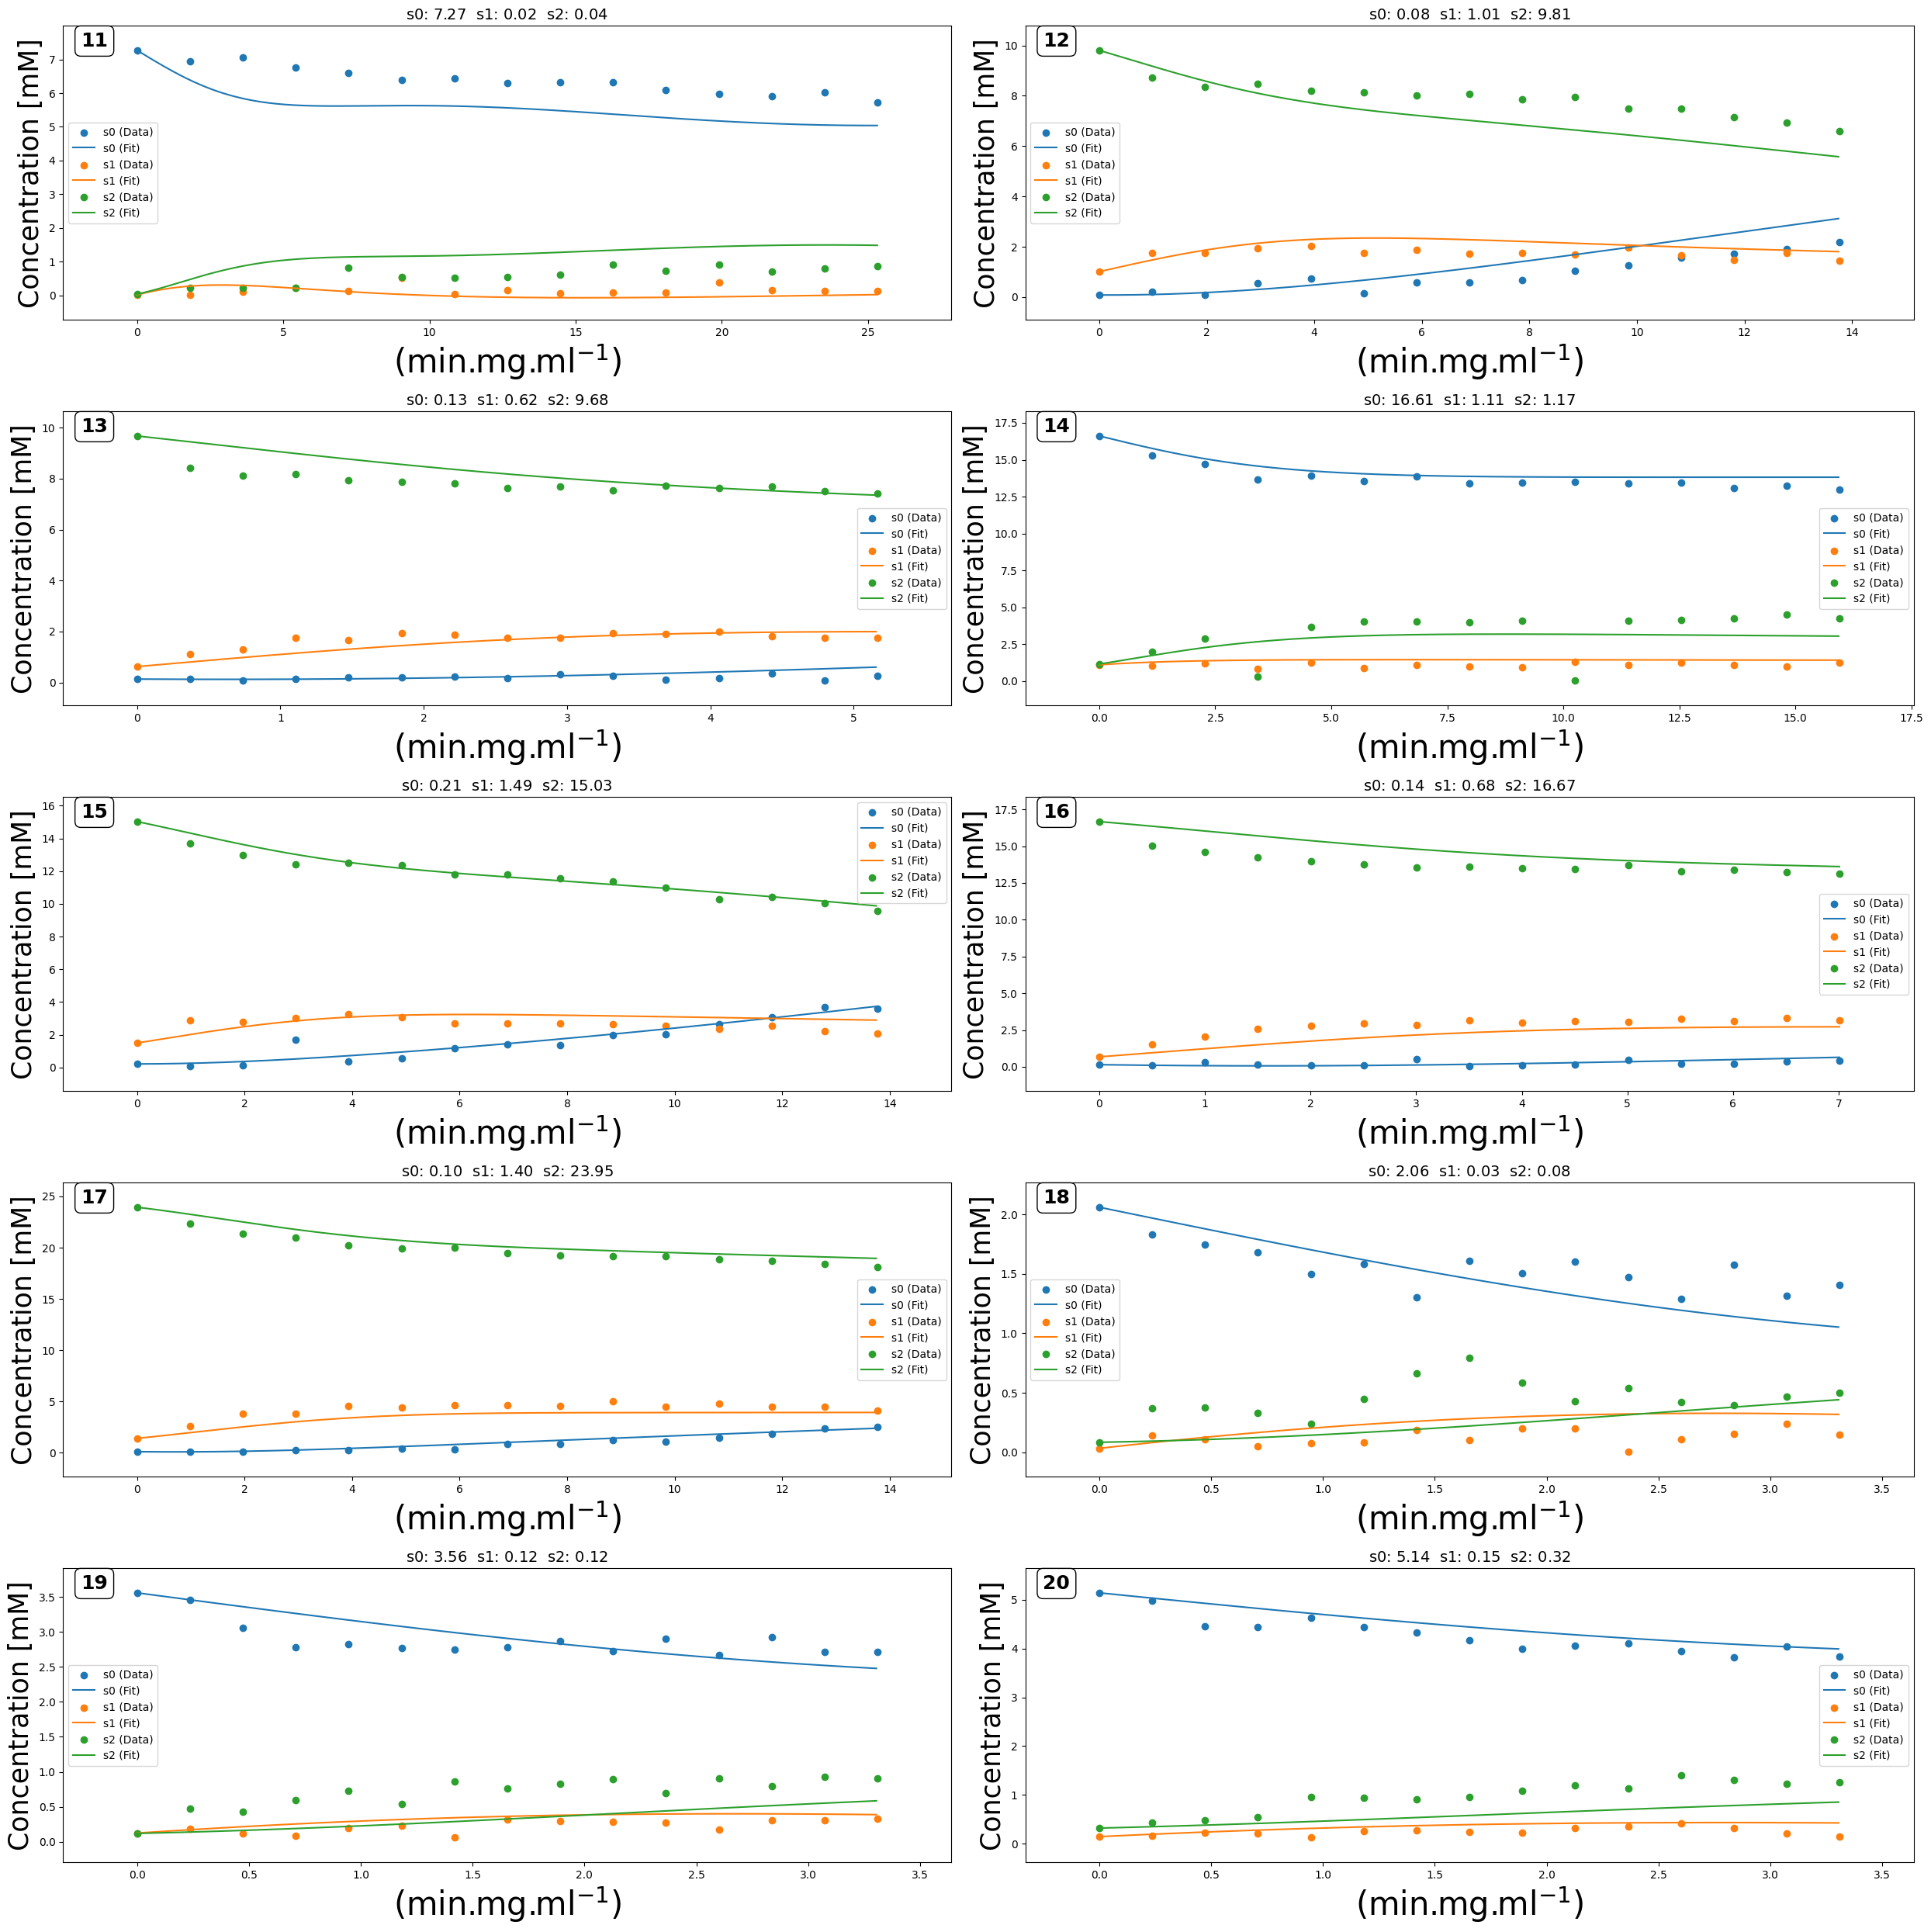

In [53]:
import matplotlib.pyplot as plt

# Number of axes
num_axes = len(loaded_figure.axes)

# Split into two groups
split_index = 10  # Number of graphs per figure
groups = [loaded_figure.axes[:split_index], loaded_figure.axes[split_index:]]

# Function to create and save a figure for a group of graphs
def create_figure(graphs, filename, start_index):
    num_axes = len(graphs)
    cols = 2
    rows = (num_axes // cols) + (num_axes % cols > 0)

    # Create a larger figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(25, rows * 5))  # Adjusted figsize
    axes = axes.flatten()  # Flatten to easily iterate over

    # Iterate over the loaded axes and the new subplots
    for i, (loaded_ax, new_ax) in enumerate(zip(graphs, axes)):
        # Initialize limits based only on the data points
        x_min, x_max = float('inf'), float('-inf')
        y_min, y_max = float('inf'), float('-inf')

        for line in loaded_ax.get_lines():
            label = line.get_label()
            x_data = line.get_xdata()
            y_data = line.get_ydata()

            if "Data" in label:
                # Scatter for data
                new_ax.scatter(x_data, y_data, label=label)
                # Update axis limits based on data points
                x_min = min(x_min, min(x_data))
                x_max = max(x_max, max(x_data))
                y_min = min(y_min, min(y_data))
                y_max = max(y_max, max(y_data))
            elif "Fit" in label:
                # Trim the fit line to only the range of the data
                valid_fit = (x_data >= x_min) & (x_data <= x_max)
                new_ax.plot(x_data[valid_fit], y_data[valid_fit], label=label)

        # Add subplot numbering in the top-left corner of each individual graph
        new_ax.text(
            0.02, 0.98, f"{start_index + i + 1}", transform=new_ax.transAxes,
            fontsize=18, fontweight='bold', va='top', ha='left',
            color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
        )

        # Set titles, labels, and legends
        new_ax.set_title(loaded_ax.get_title(), fontsize=14)
        new_ax.set_xlabel("(min.mg.ml$^{-1}$)", fontsize=30)  # Superscript for ^-1
        new_ax.set_ylabel("Concentration [mM]", fontsize=25)
        new_ax.legend(loc='best', fontsize=10)

        # Dynamically adjust x and y limits with a small margin
        margin_x = 0.1 * (x_max - x_min)
        margin_y = 0.1 * (y_max - y_min)
        new_ax.set_xlim(x_min - margin_x, x_max + margin_x)
        new_ax.set_ylim(y_min - margin_y, y_max + margin_y)

    # Hide unused subplots
    for ax in axes[num_axes:]:
        ax.axis('off')

    # Adjust layout and spacing
    plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust spacing between subplots

    # Save the figure to a file
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches="tight")  # Save with specific name

    # Show the figure
    plt.show()


# Create and save the first figure
create_figure(groups[0], "Training Set 3 Visualization Val Part 1.png", start_index=0)

# Create and save the second figure
create_figure(groups[1], "Training Set 3 Visualization Val Part 2.png", start_index=10)

In [ ]:
## Just loading the first 4 for the thesis 

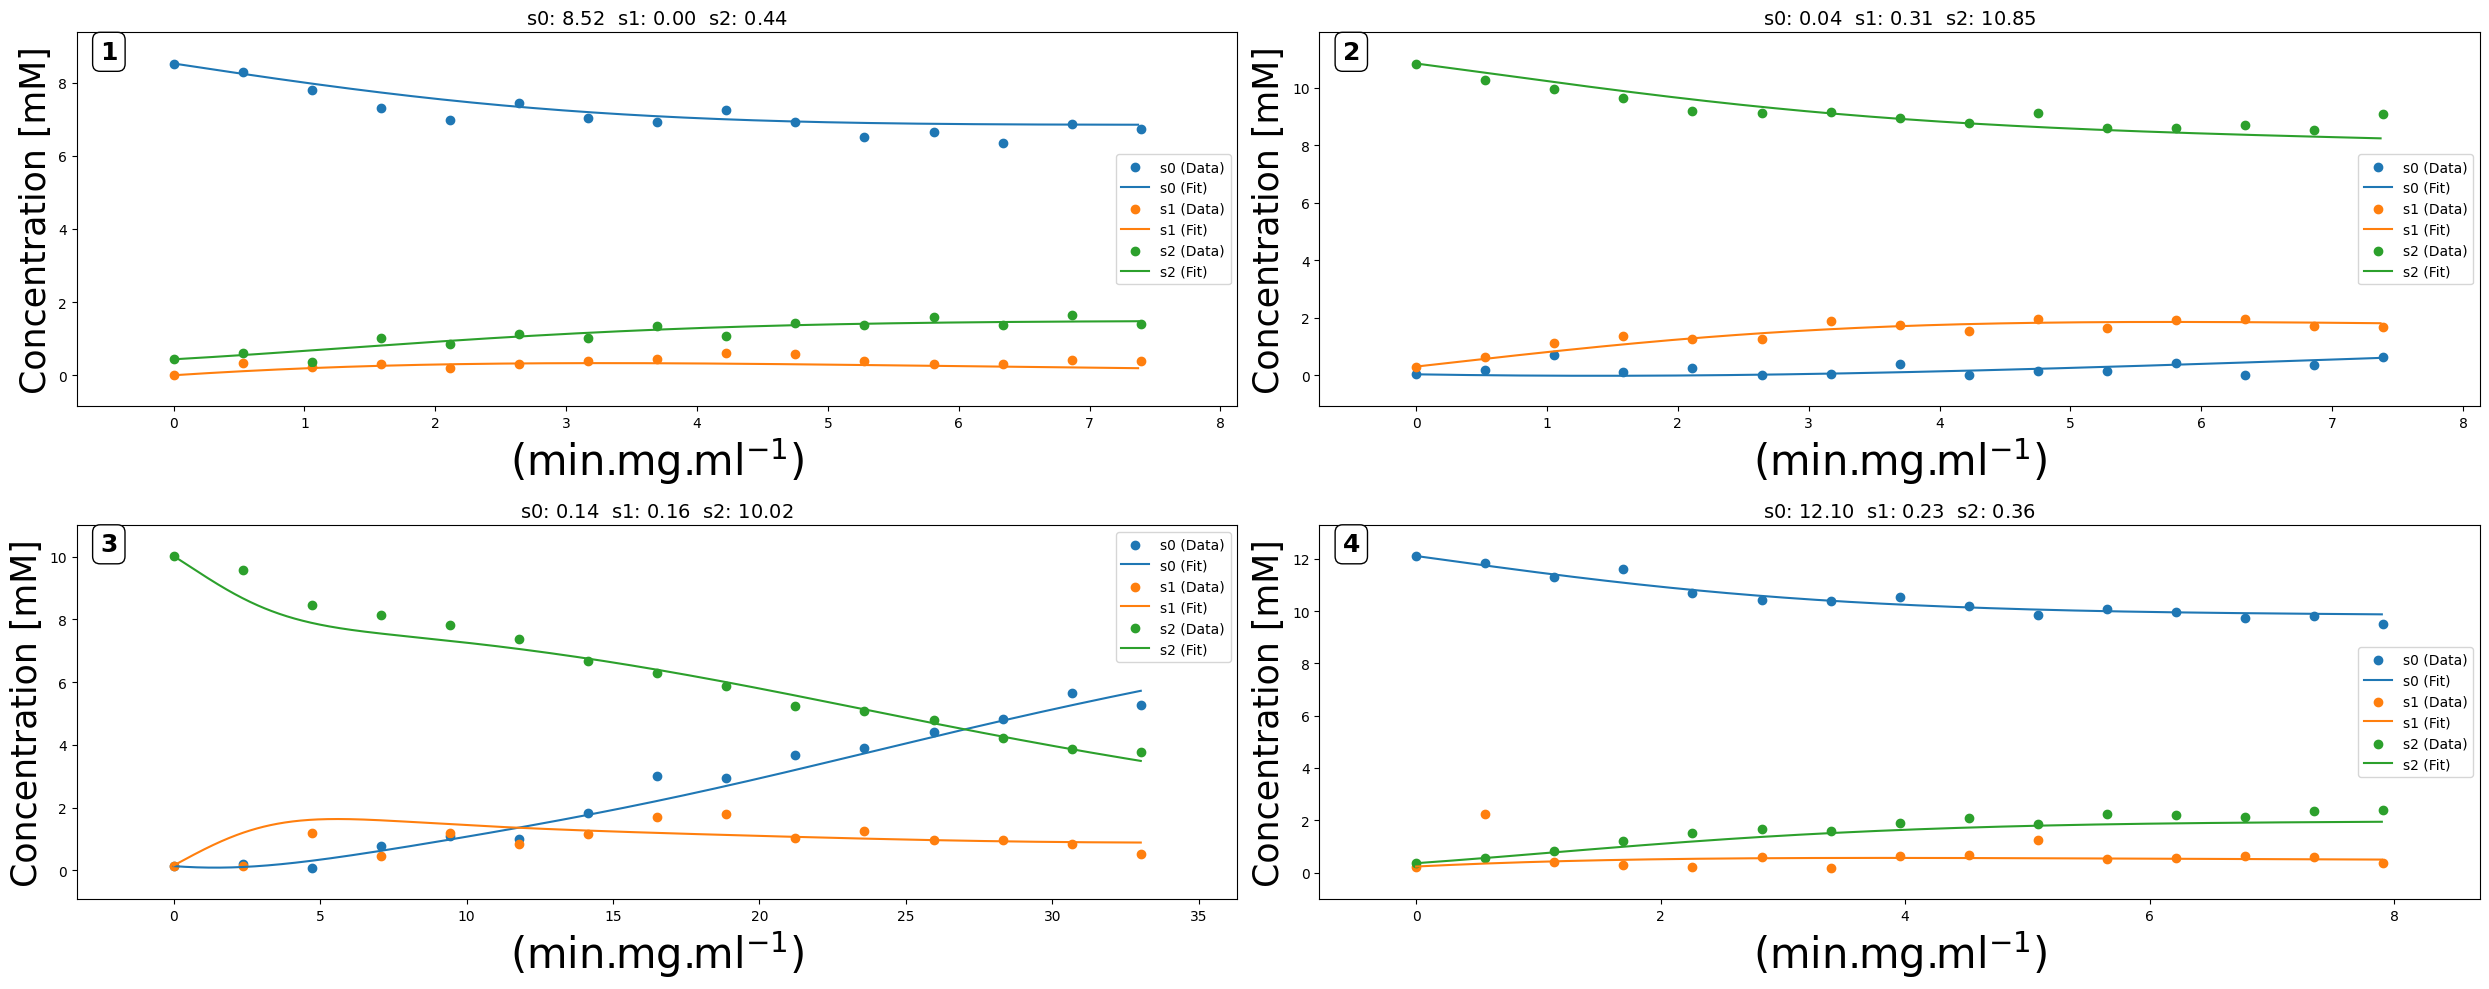

In [54]:
import matplotlib.pyplot as plt

# Function to create and save a figure for a group of graphs
def create_figure(graphs, filename, start_index):
    num_axes = len(graphs)
    cols = 2
    rows = (num_axes // cols) + (num_axes % cols > 0)

    # Create a larger figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(25, rows * 5))  # Adjusted figsize
    axes = axes.flatten()  # Flatten to easily iterate over

    # Iterate over the loaded axes and the new subplots
    for i, (loaded_ax, new_ax) in enumerate(zip(graphs, axes)):
        # Initialize limits based only on the data points
        x_min, x_max = float('inf'), float('-inf')
        y_min, y_max = float('inf'), float('-inf')

        for line in loaded_ax.get_lines():
            label = line.get_label()
            x_data = line.get_xdata()
            y_data = line.get_ydata()

            if "Data" in label:
                # Scatter for data
                new_ax.scatter(x_data, y_data, label=label)
                # Update axis limits based on data points
                x_min = min(x_min, min(x_data))
                x_max = max(x_max, max(x_data))
                y_min = min(y_min, min(y_data))
                y_max = max(y_max, max(y_data))
            elif "Fit" in label:
                # Trim the fit line to only the range of the data
                valid_fit = (x_data >= x_min) & (x_data <= x_max)
                new_ax.plot(x_data[valid_fit], y_data[valid_fit], label=label)

        # Add subplot numbering in the top-left corner of each individual graph
        new_ax.text(
            0.02, 0.98, f"{start_index + i + 1}", transform=new_ax.transAxes,
            fontsize=18, fontweight='bold', va='top', ha='left',
            color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
        )

        # Set titles, labels, and legends
        new_ax.set_title(loaded_ax.get_title(), fontsize=14)
        new_ax.set_xlabel("(min.mg.ml$^{-1}$)", fontsize=30)  # Superscript for ^-1
        new_ax.set_ylabel("Concentration [mM]", fontsize=25)
        new_ax.legend(loc='best', fontsize=10)

        # Dynamically adjust x and y limits with a small margin
        margin_x = 0.1 * (x_max - x_min)
        margin_y = 0.1 * (y_max - y_min)
        new_ax.set_xlim(x_min - margin_x, x_max + margin_x)
        new_ax.set_ylim(y_min - margin_y, y_max + margin_y)

    # Hide unused subplots
    for ax in axes[num_axes:]:
        ax.axis('off')

    # Adjust layout and spacing
    plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust spacing between subplots

    # Save the figure to a file
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches="tight")  # Save with specific name

    # Show the figure
    plt.show()


# Select only the first 4 graphs
graphs_to_show = loaded_figure.axes[:4]

# Create and save the figure
create_figure(graphs_to_show, "Training Set 3 Visualization Val First 4.png", start_index=0)


#Lmfit first 4 graphs for thesis 

In [55]:
import pickle
file_path = 'C:/Users/danic/Thesis/Data/Training_Set_3_Val_visualization_lmfit.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)
print(data)

Figure(24000x2400)


In [56]:
# Load the figure
with open(file_path, 'rb') as file:
    loaded_figure = pickle.load(file)

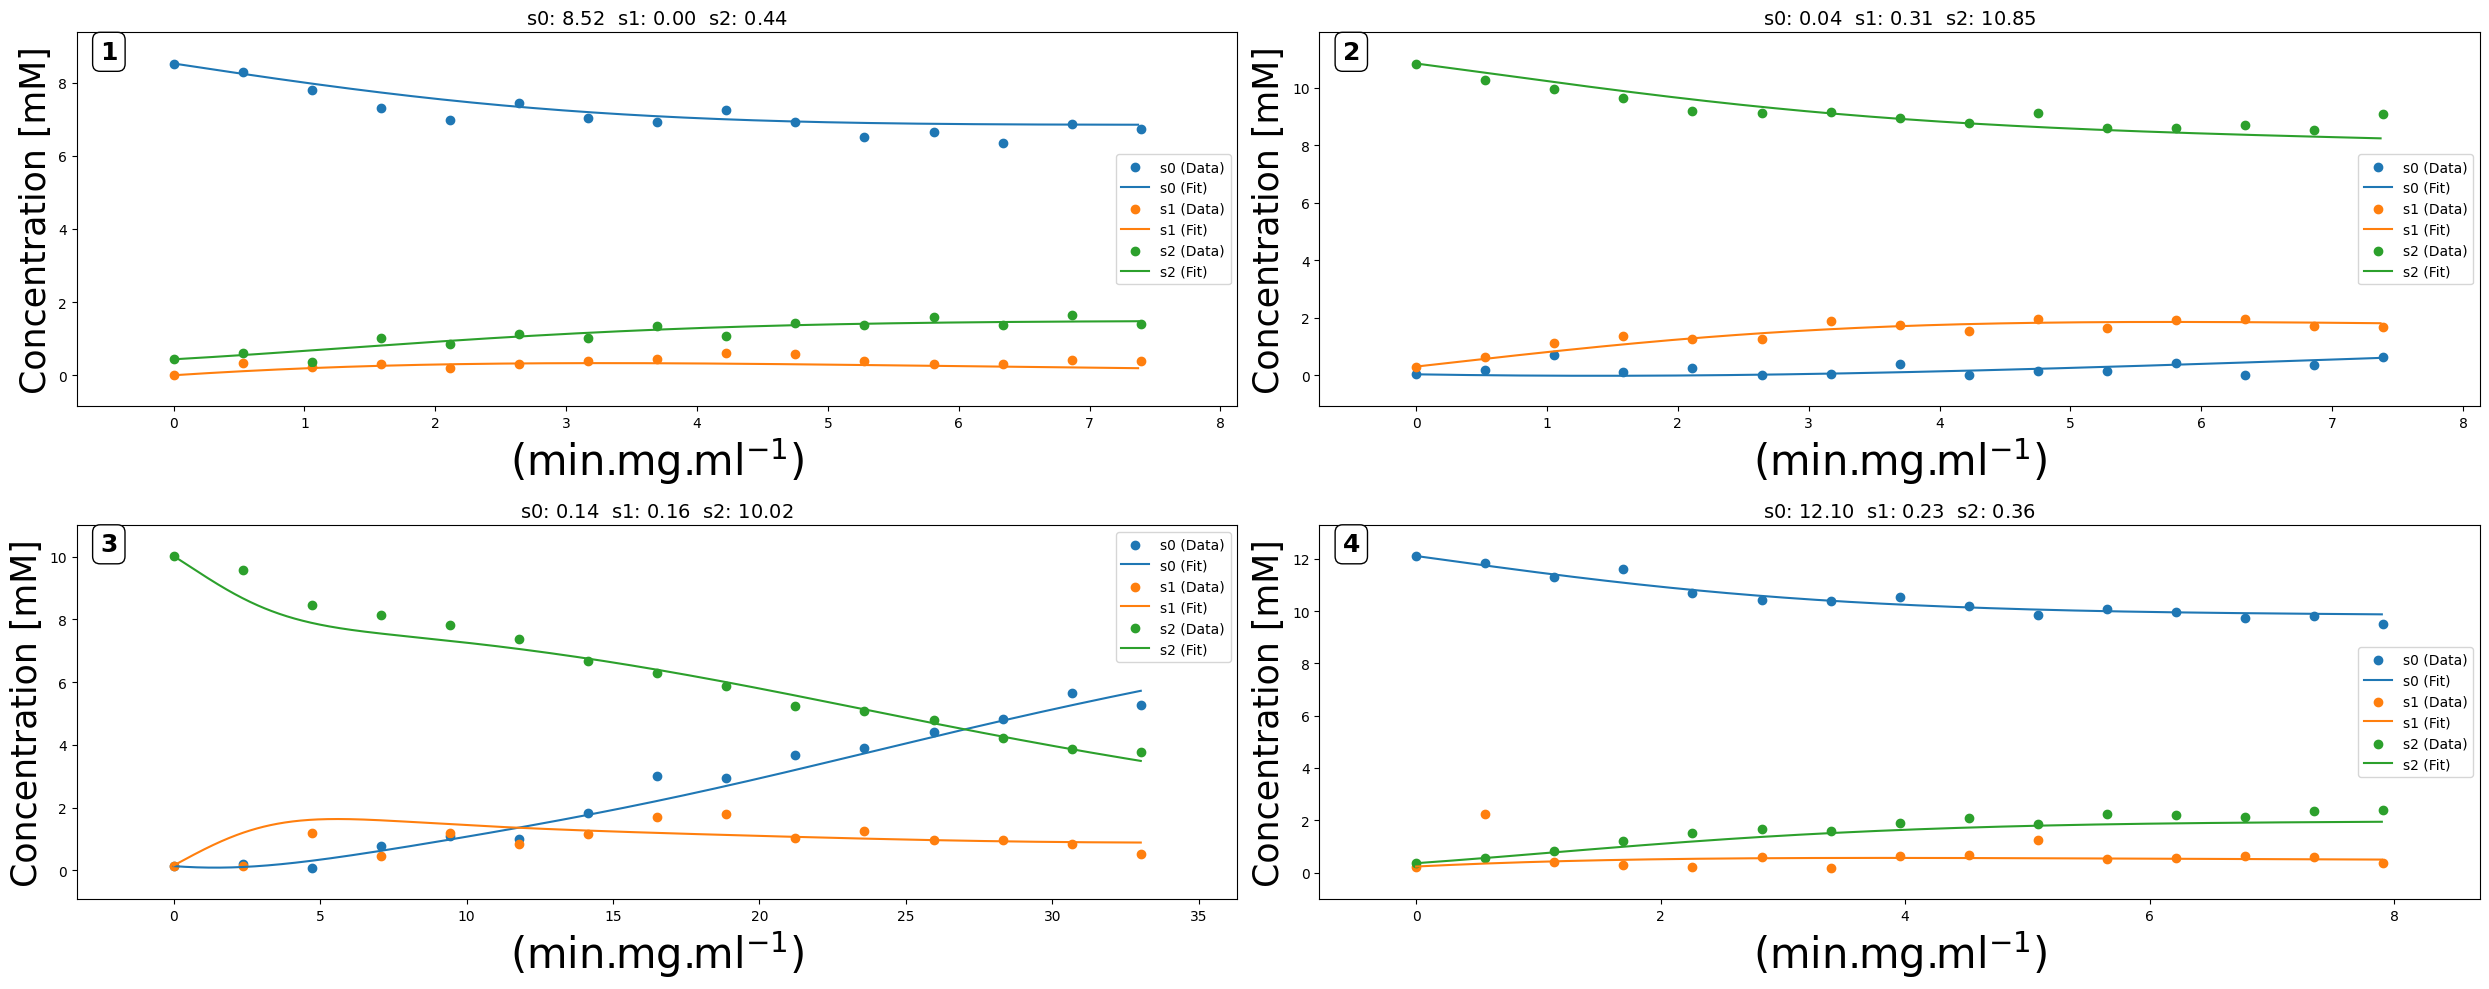

In [57]:
import matplotlib.pyplot as plt

# Function to create and save a figure for a group of graphs
def create_figure(graphs, filename, start_index):
    num_axes = len(graphs)
    cols = 2
    rows = (num_axes // cols) + (num_axes % cols > 0)

    # Create a larger figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(25, rows * 5))  # Adjusted figsize
    axes = axes.flatten()  # Flatten to easily iterate over

    # Iterate over the loaded axes and the new subplots
    for i, (loaded_ax, new_ax) in enumerate(zip(graphs, axes)):
        # Initialize limits based only on the data points
        x_min, x_max = float('inf'), float('-inf')
        y_min, y_max = float('inf'), float('-inf')

        for line in loaded_ax.get_lines():
            label = line.get_label()
            x_data = line.get_xdata()
            y_data = line.get_ydata()

            if "Data" in label:
                # Scatter for data
                new_ax.scatter(x_data, y_data, label=label)
                # Update axis limits based on data points
                x_min = min(x_min, min(x_data))
                x_max = max(x_max, max(x_data))
                y_min = min(y_min, min(y_data))
                y_max = max(y_max, max(y_data))
            elif "Fit" in label:
                # Trim the fit line to only the range of the data
                valid_fit = (x_data >= x_min) & (x_data <= x_max)
                new_ax.plot(x_data[valid_fit], y_data[valid_fit], label=label)

        # Add subplot numbering in the top-left corner of each individual graph
        new_ax.text(
            0.02, 0.98, f"{start_index + i + 1}", transform=new_ax.transAxes,
            fontsize=18, fontweight='bold', va='top', ha='left',
            color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
        )

        # Set titles, labels, and legends
        new_ax.set_title(loaded_ax.get_title(), fontsize=14)
        new_ax.set_xlabel("(min.mg.ml$^{-1}$)", fontsize=30)  # Superscript for ^-1
        new_ax.set_ylabel("Concentration [mM]", fontsize=25)
        new_ax.legend(loc='best', fontsize=10)

        # Dynamically adjust x and y limits with a small margin
        margin_x = 0.1 * (x_max - x_min)
        margin_y = 0.1 * (y_max - y_min)
        new_ax.set_xlim(x_min - margin_x, x_max + margin_x)
        new_ax.set_ylim(y_min - margin_y, y_max + margin_y)

    # Hide unused subplots
    for ax in axes[num_axes:]:
        ax.axis('off')

    # Adjust layout and spacing
    plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust spacing between subplots

    # Save the figure to a file
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches="tight")  # Save with specific name

    # Show the figure
    plt.show()


# Select only the first 4 graphs
graphs_to_show = loaded_figure.axes[:4]

# Create and save the figure
create_figure(graphs_to_show, "Training Set 3 Visualization Val First 4 LMFIT.png", start_index=0)

## Training Set 4 

In [72]:
import pickle
file_path = 'C:/Users/danic/Thesis/Data/Training_Set_4_VAL_visualization.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)
print(data)

Figure(2700x6000)


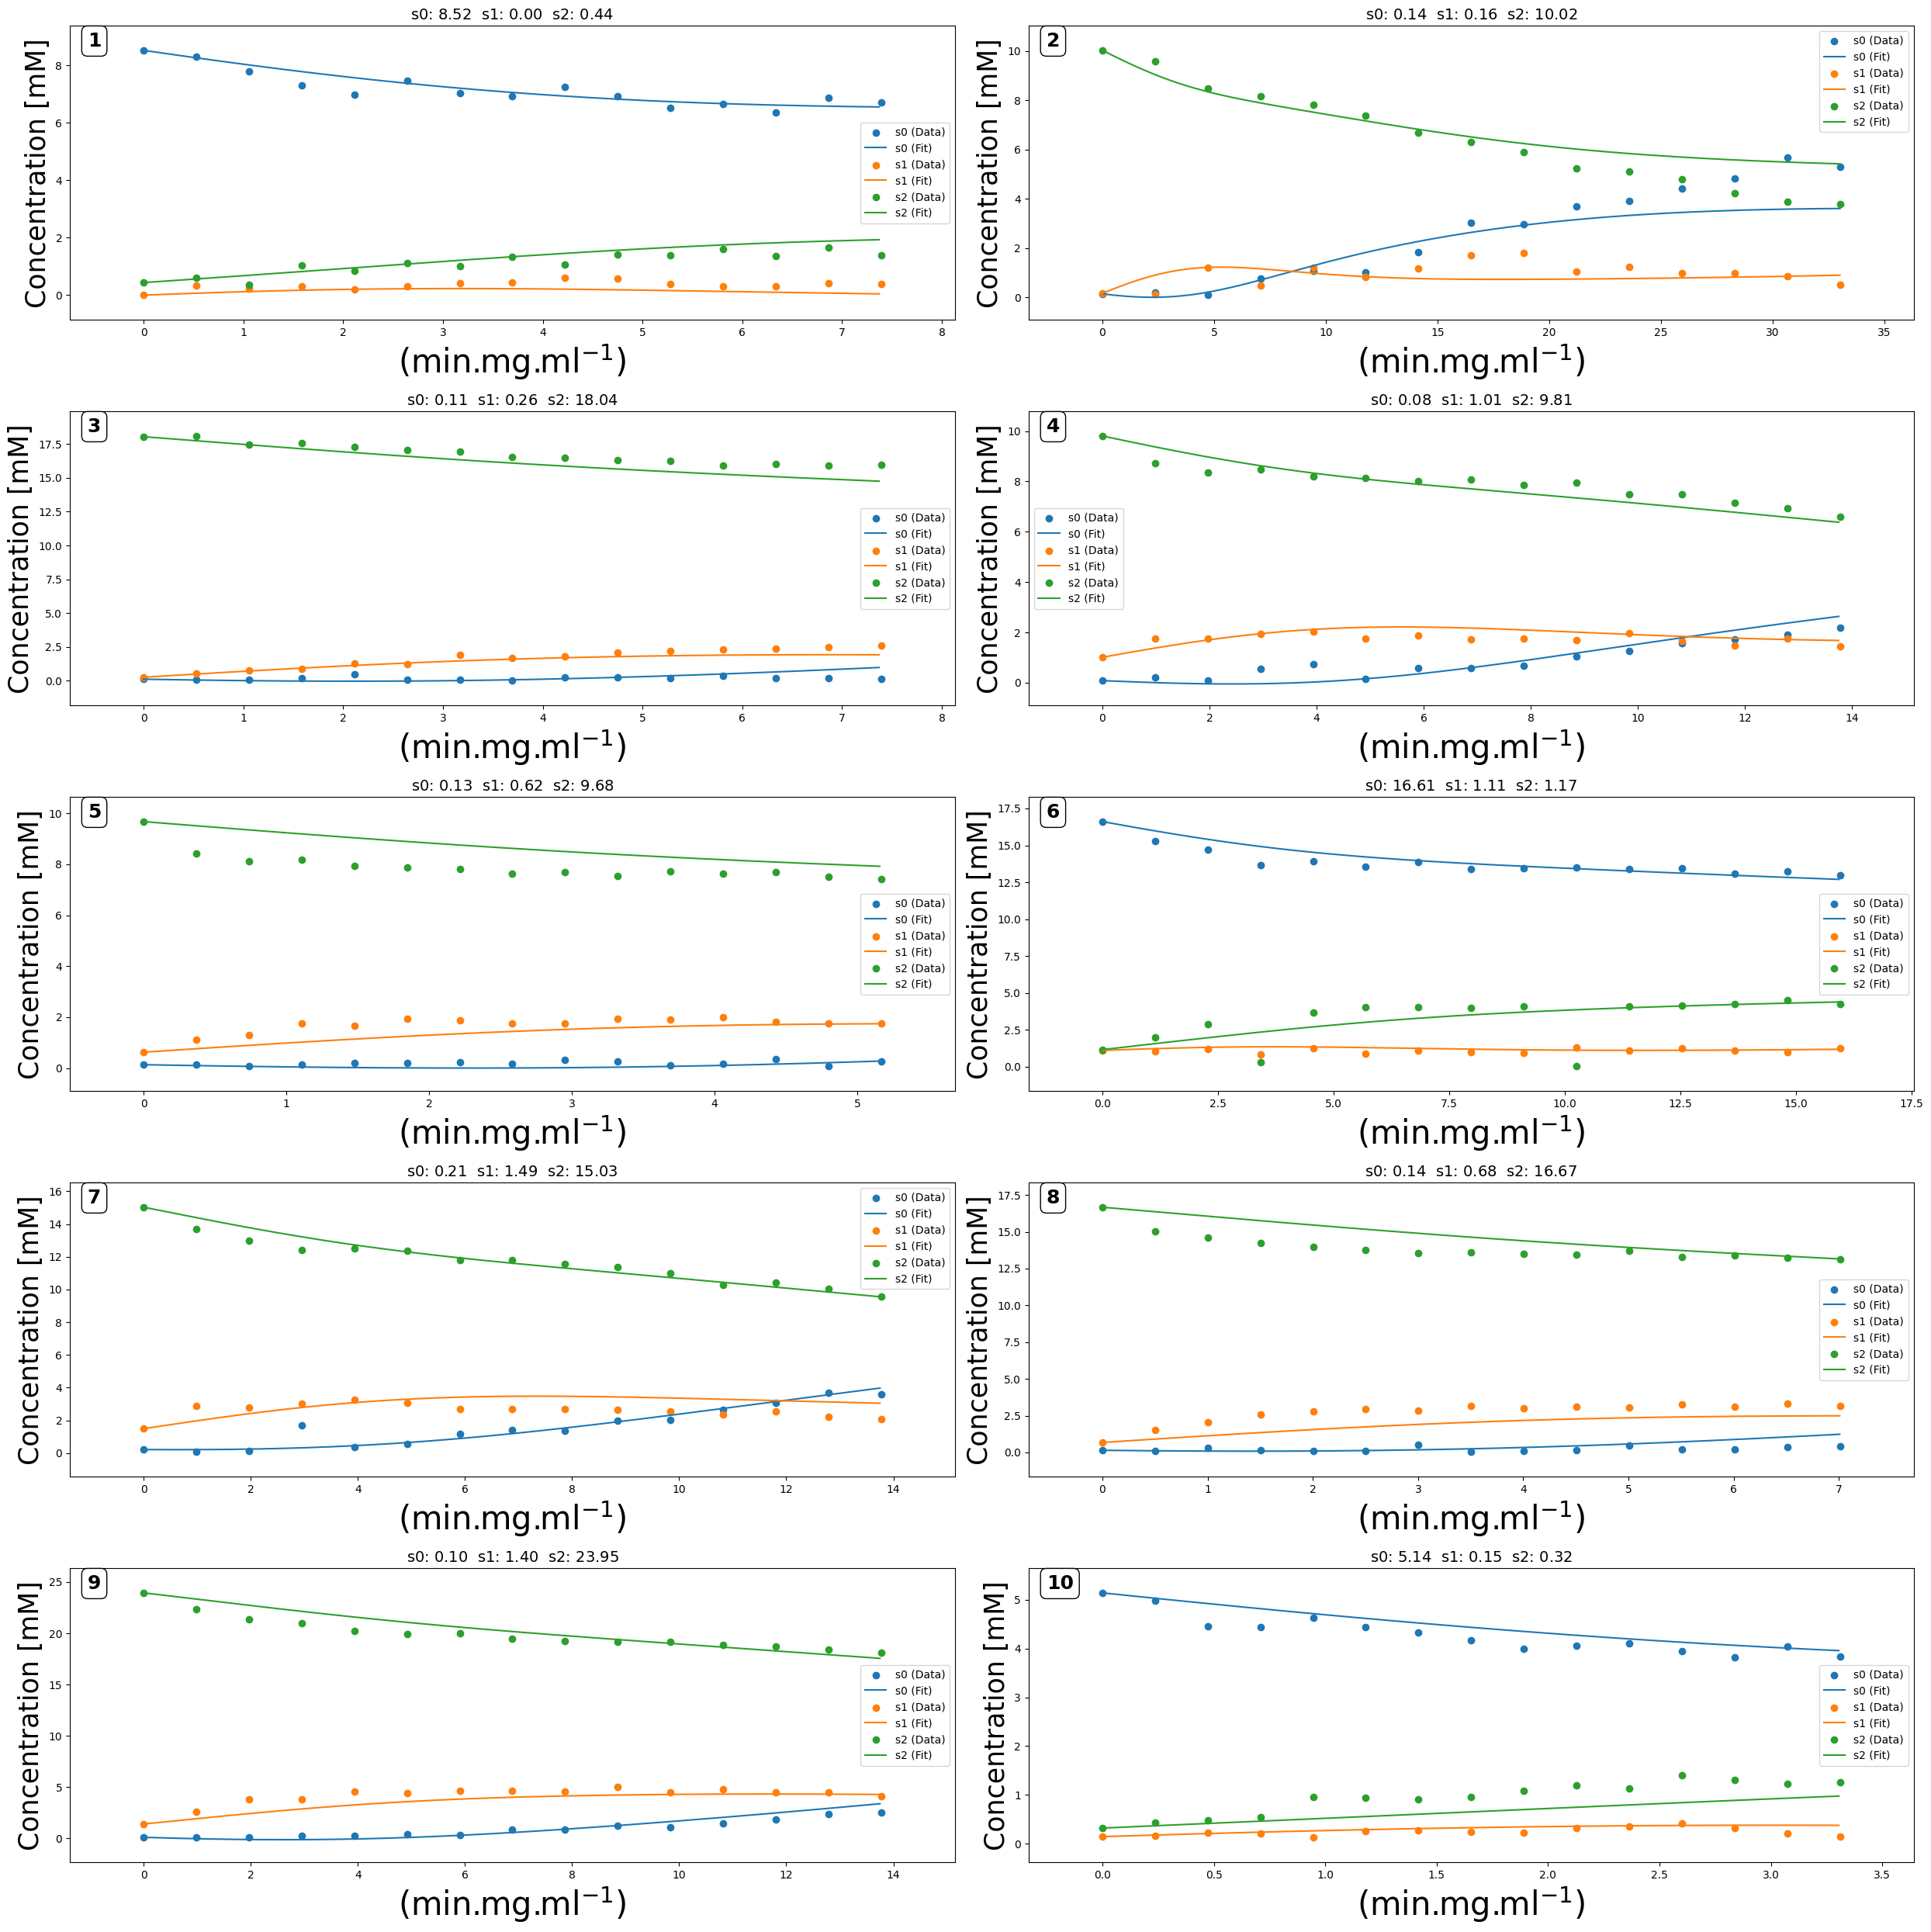

No graphs to plot in Training Set 4 Visualization Val Part 2.png.


In [74]:
import matplotlib.pyplot as plt

# Number of axes
num_axes = len(loaded_figure.axes)

# Split into two groups
split_index = 10  # Number of graphs per figure
groups = [loaded_figure.axes[:split_index], loaded_figure.axes[split_index:]]

# Function to create and save a figure for a group of graphs
def create_figure(graphs, filename, start_index):
    num_axes = len(graphs)

    # Skip if there are no graphs to plot
    if num_axes == 0:
        print(f"No graphs to plot in {filename}.")
        return

    cols = 2
    rows = (num_axes // cols) + (num_axes % cols > 0)

    # Create a larger figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(25, rows * 5))  # Adjusted figsize
    axes = axes.flatten()  # Flatten to easily iterate over

    # Iterate over the loaded axes and the new subplots
    for i, (loaded_ax, new_ax) in enumerate(zip(graphs, axes)):
        # Initialize limits based only on the data points
        x_min, x_max = float('inf'), float('-inf')
        y_min, y_max = float('inf'), float('-inf')

        for line in loaded_ax.get_lines():
            label = line.get_label()
            x_data = line.get_xdata()
            y_data = line.get_ydata()

            if "Data" in label:
                # Scatter for data
                new_ax.scatter(x_data, y_data, label=label)
                # Update axis limits based on data points
                x_min = min(x_min, min(x_data))
                x_max = max(x_max, max(x_data))
                y_min = min(y_min, min(y_data))
                y_max = max(y_max, max(y_data))
            elif "Fit" in label:
                # Trim the fit line to only the range of the data
                valid_fit = (x_data >= x_min) & (x_data <= x_max)
                new_ax.plot(x_data[valid_fit], y_data[valid_fit], label=label)

        # Add subplot numbering in the top-left corner of each individual graph
        new_ax.text(
            0.02, 0.98, f"{start_index + i + 1}", transform=new_ax.transAxes,
            fontsize=18, fontweight='bold', va='top', ha='left',
            color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
        )

        # Set titles, labels, and legends
        new_ax.set_title(loaded_ax.get_title(), fontsize=14)
        new_ax.set_xlabel("(min.mg.ml$^{-1}$)", fontsize=30)  # Superscript for ^-1
        new_ax.set_ylabel("Concentration [mM]", fontsize=25)
        new_ax.legend(loc='best', fontsize=10)

        # Dynamically adjust x and y limits with a small margin
        margin_x = 0.1 * (x_max - x_min)
        margin_y = 0.1 * (y_max - y_min)
        if x_min != float('inf') and y_min != float('inf'):  # Ensure valid limits
            new_ax.set_xlim(x_min - margin_x, x_max + margin_x)
            new_ax.set_ylim(y_min - margin_y, y_max + margin_y)
        else:
            print(f"Skipping subplot {start_index + i + 1} due to invalid limits.")

    # Hide unused subplots
    for ax in axes[num_axes:]:
        ax.axis('off')

    # Adjust layout and spacing
    plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust spacing between subplots

    # Save the figure to a file
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches="tight")  # Save with specific name

    # Show the figure
    plt.show()


# Create and save the first figure
create_figure(groups[0], "Training Set 4 Visualization Val Part 1.png", start_index=0)

# Create and save the second figure
create_figure(groups[1], "Training Set 4 Visualization Val Part 2.png", start_index=10)


In [71]:
print(f"Number of graphs (axes): {len(loaded_figure.axes)}")


Number of graphs (axes): 10


## Training set 5

In [81]:
import pickle
file_path = 'C:/Users/danic/Thesis/Data/Training_Set_5_Val_visualization.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)
print(data)

Figure(24000x2400)


In [82]:
# Load the figure
with open(file_path, 'rb') as file:
    loaded_figure = pickle.load(file)

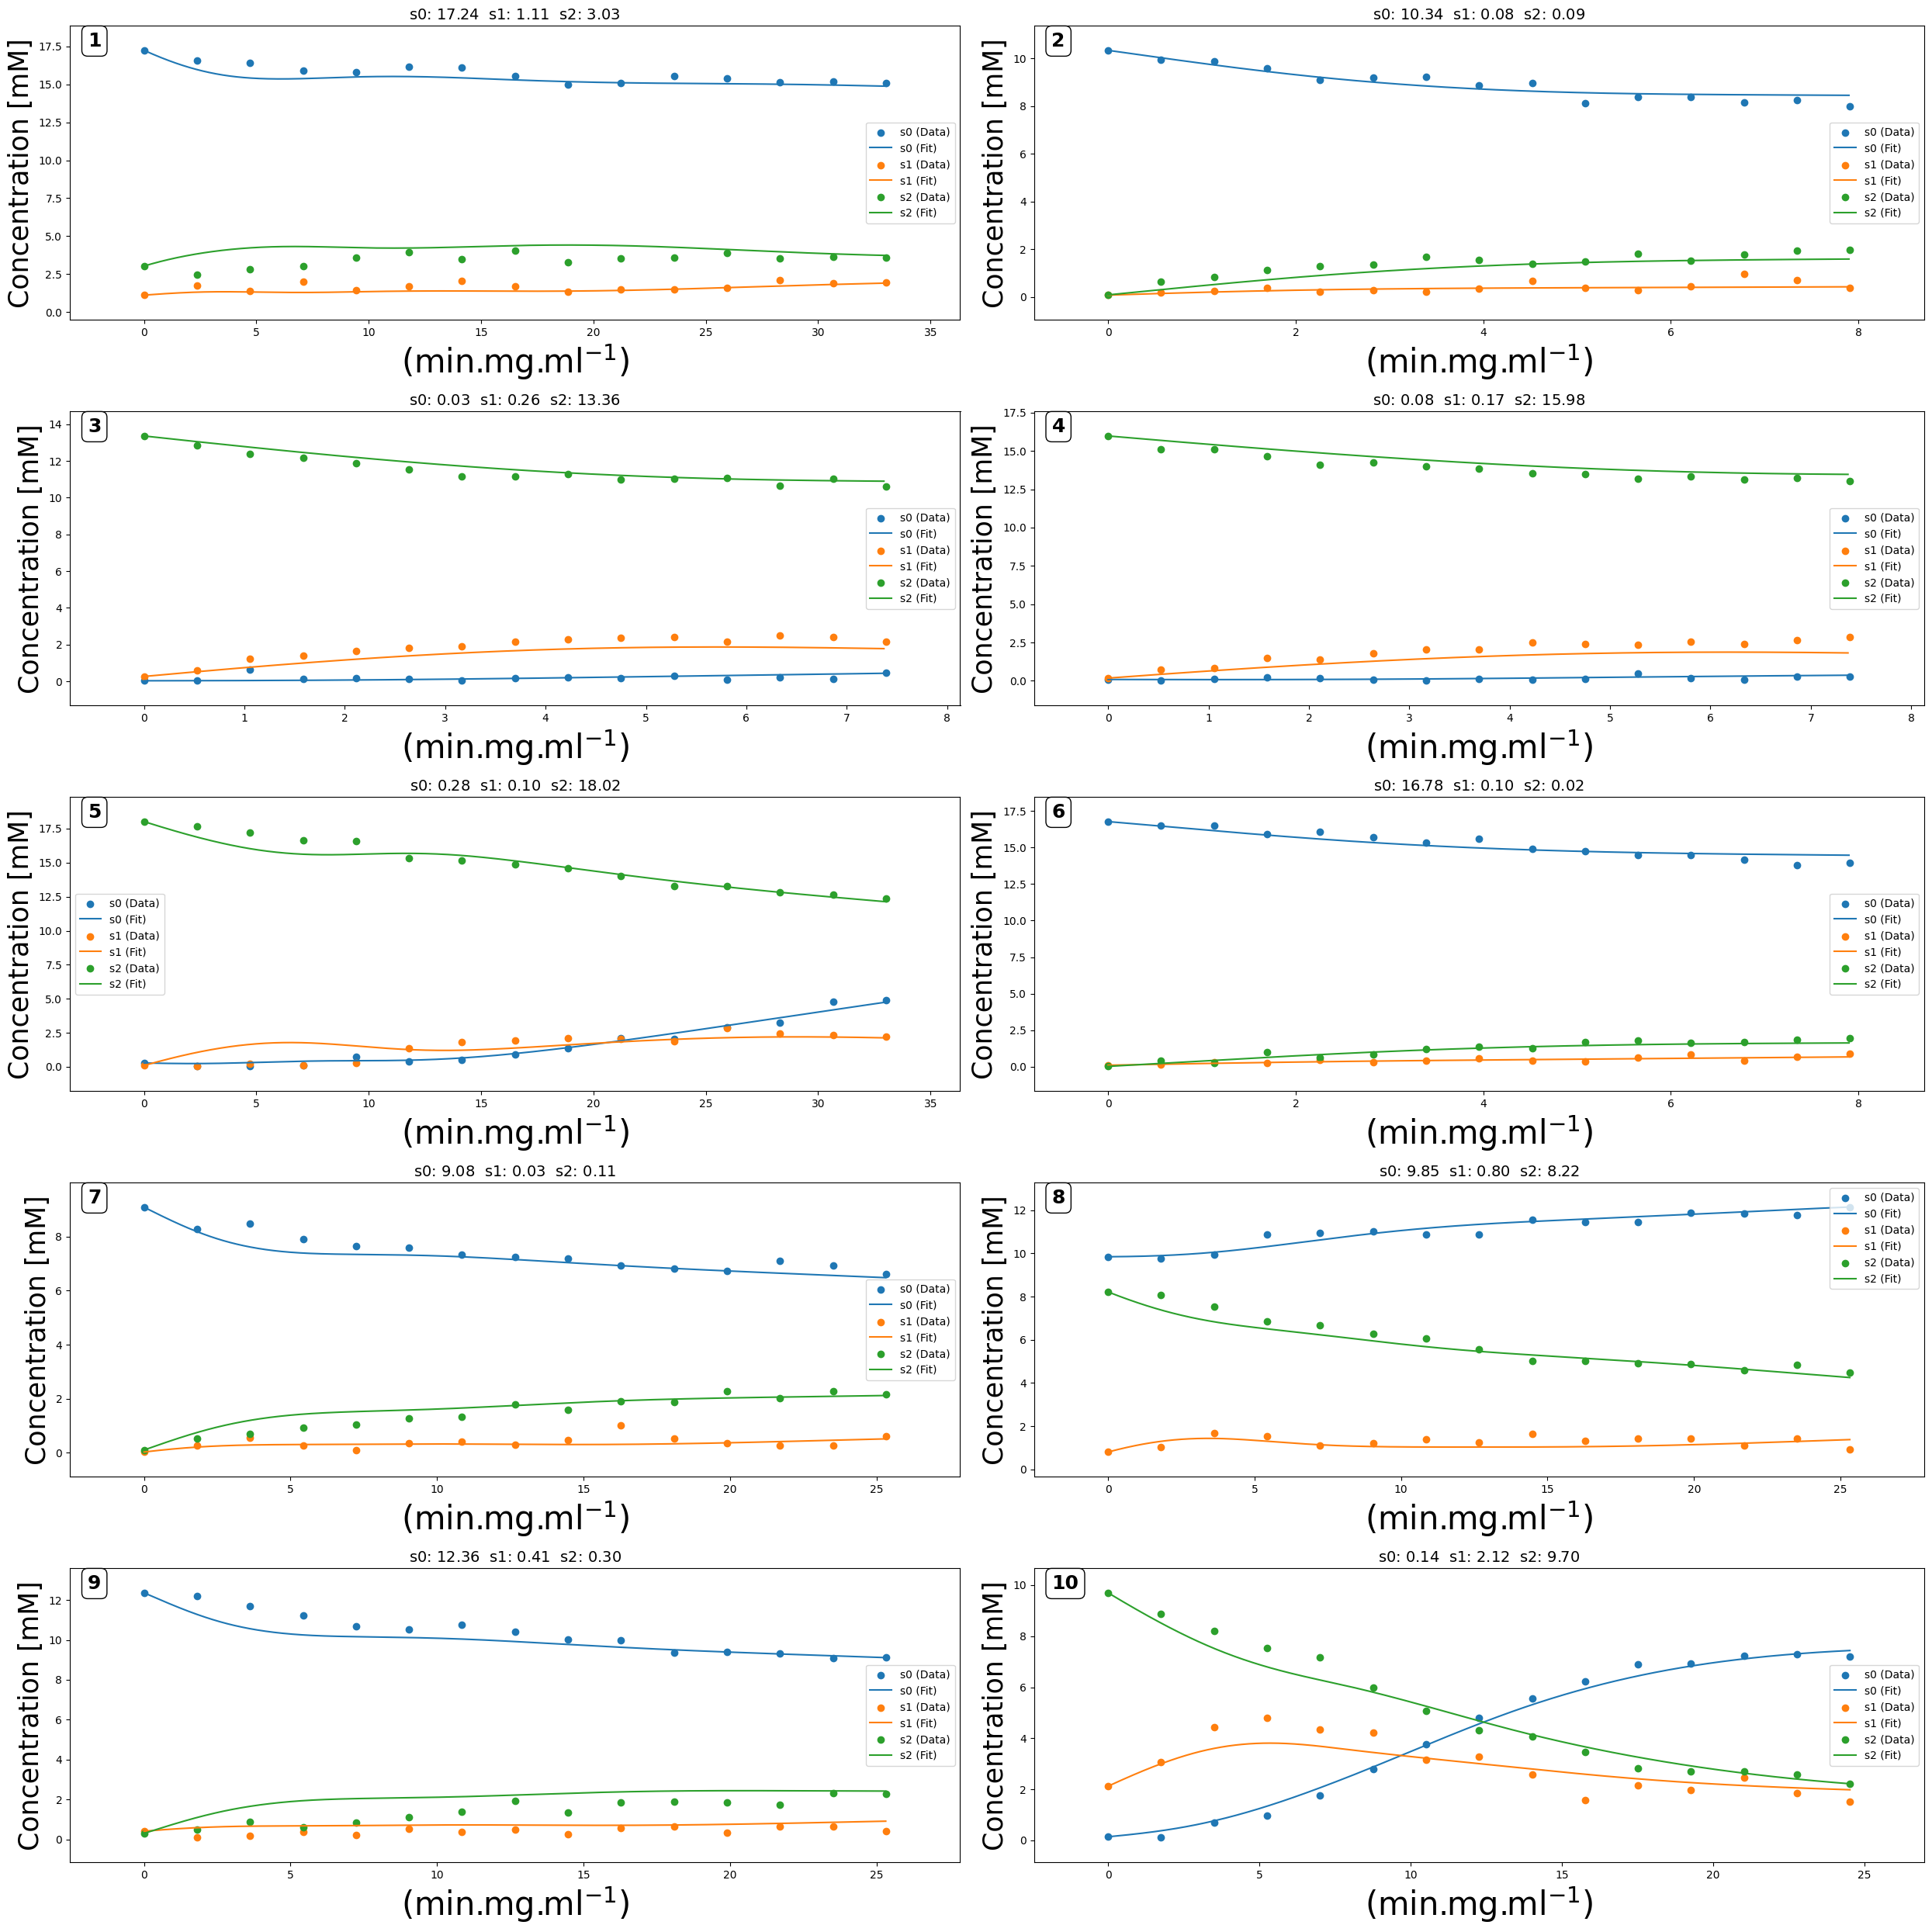

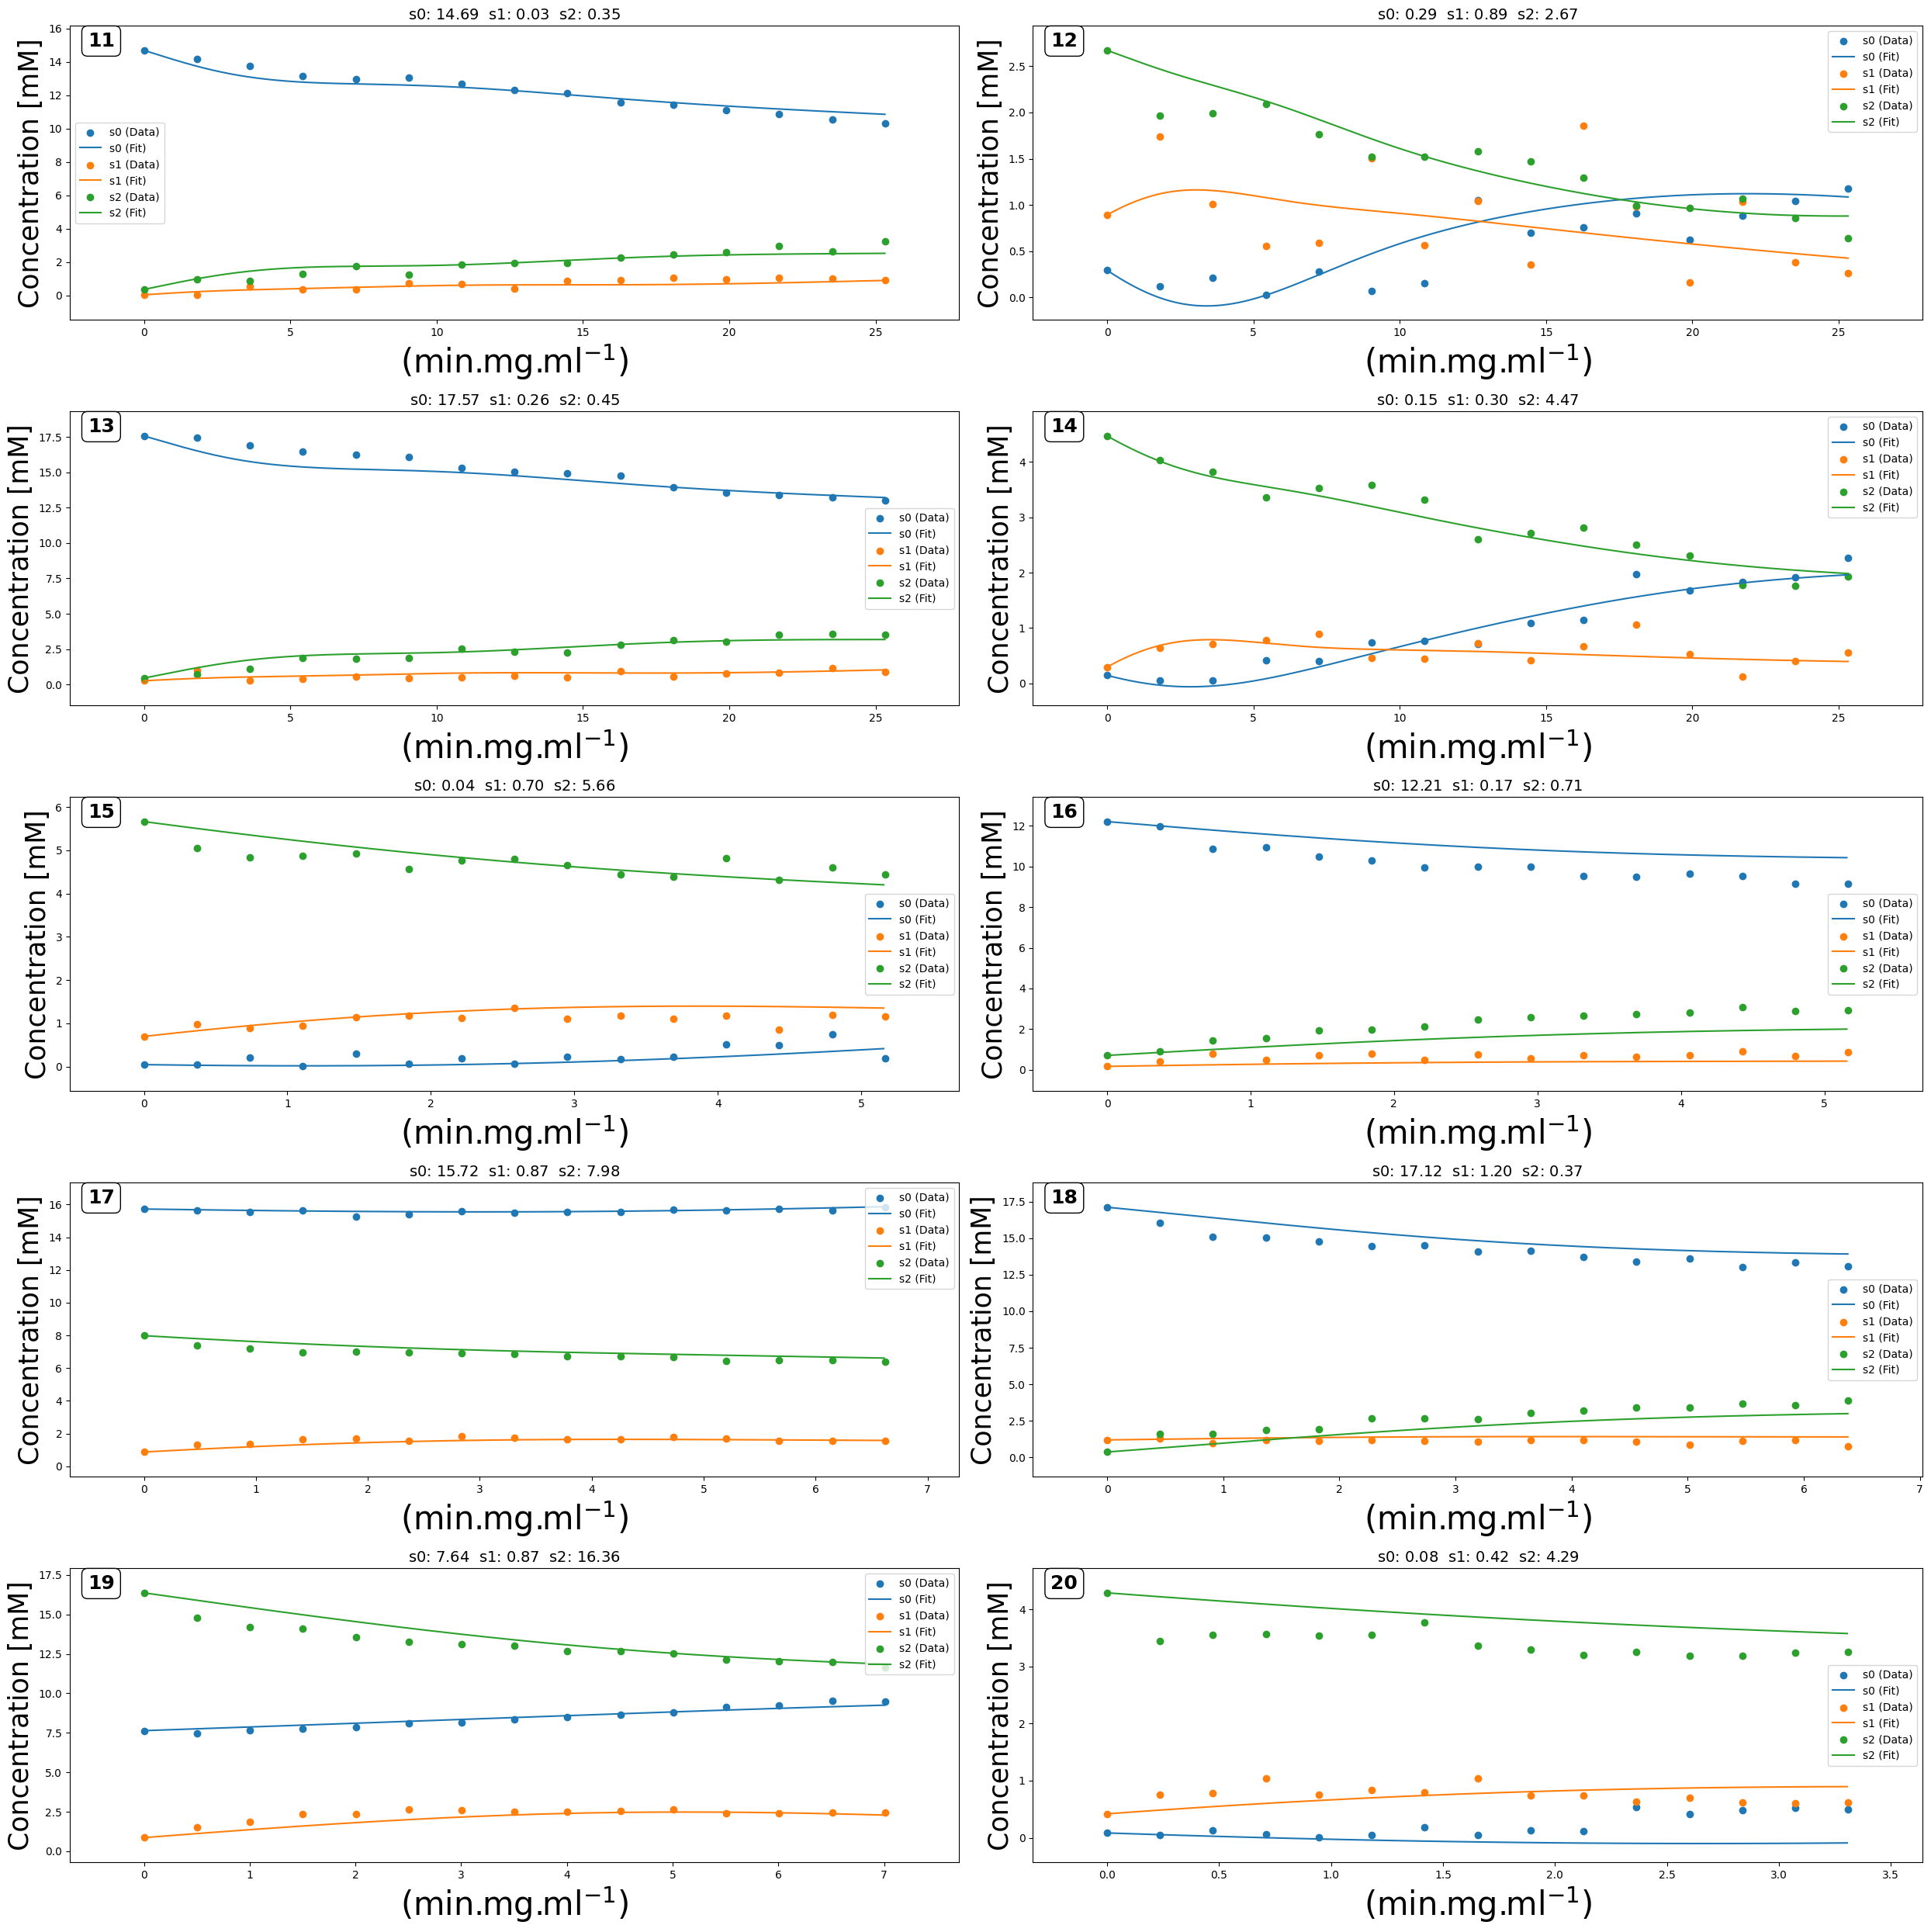

In [83]:
import matplotlib.pyplot as plt

# Number of axes
num_axes = len(loaded_figure.axes)

# Split into two groups
split_index = 10  # Number of graphs per figure
groups = [loaded_figure.axes[:split_index], loaded_figure.axes[split_index:]]

# Function to create and save a figure for a group of graphs
def create_figure(graphs, filename, start_index):
    num_axes = len(graphs)

    # Skip if there are no graphs to plot
    if num_axes == 0:
        print(f"No graphs to plot in {filename}.")
        return

    cols = 2
    rows = (num_axes // cols) + (num_axes % cols > 0)

    # Create a larger figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(25, rows * 5))  # Adjusted figsize
    axes = axes.flatten()  # Flatten to easily iterate over

    # Iterate over the loaded axes and the new subplots
    for i, (loaded_ax, new_ax) in enumerate(zip(graphs, axes)):
        # Initialize limits based only on the data points
        x_min, x_max = float('inf'), float('-inf')
        y_min, y_max = float('inf'), float('-inf')

        for line in loaded_ax.get_lines():
            label = line.get_label()
            x_data = line.get_xdata()
            y_data = line.get_ydata()

            if "Data" in label:
                # Scatter for data
                new_ax.scatter(x_data, y_data, label=label)
                # Update axis limits based on data points
                x_min = min(x_min, min(x_data))
                x_max = max(x_max, max(x_data))
                y_min = min(y_min, min(y_data))
                y_max = max(y_max, max(y_data))
            elif "Fit" in label:
                # Trim the fit line to only the range of the data
                valid_fit = (x_data >= x_min) & (x_data <= x_max)
                new_ax.plot(x_data[valid_fit], y_data[valid_fit], label=label)

        # Add subplot numbering in the top-left corner of each individual graph
        new_ax.text(
            0.02, 0.98, f"{start_index + i + 1}", transform=new_ax.transAxes,
            fontsize=18, fontweight='bold', va='top', ha='left',
            color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
        )

        # Set titles, labels, and legends
        new_ax.set_title(loaded_ax.get_title(), fontsize=14)
        new_ax.set_xlabel("(min.mg.ml$^{-1}$)", fontsize=30)  # Superscript for ^-1
        new_ax.set_ylabel("Concentration [mM]", fontsize=25)
        new_ax.legend(loc='best', fontsize=10)

        # Dynamically adjust x and y limits with a small margin
        margin_x = 0.1 * (x_max - x_min)
        margin_y = 0.1 * (y_max - y_min)
        if x_min != float('inf') and y_min != float('inf'):  # Ensure valid limits
            new_ax.set_xlim(x_min - margin_x, x_max + margin_x)
            new_ax.set_ylim(y_min - margin_y, y_max + margin_y)
        else:
            print(f"Skipping subplot {start_index + i + 1} due to invalid limits.")

    # Hide unused subplots
    for ax in axes[num_axes:]:
        ax.axis('off')

    # Adjust layout and spacing
    plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust spacing between subplots

    # Save the figure to a file
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches="tight")  # Save with specific name

    # Show the figure
    plt.show()


# Create and save the first figure
create_figure(groups[0], "Training Set 5 Visualization Val Part 1.png", start_index=0)

# Create and save the second figure
create_figure(groups[1], "Training Set 5 Visualization Val Part 2.png", start_index=10)

## HDPI 

In [76]:
import pickle
file_path = 'C:/Users/danic/Thesis/Data/Training_Set_3_Params_visualization.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)
print(data)

Figure(2700x12000)


In [77]:
# Load the figure
with open(file_path, 'rb') as file:
    loaded_figure = pickle.load(file)

In [79]:
for line in loaded_ax.get_lines():
    print(f"Label: {line.get_label()}")


Label: s0 (Data)
Label: s0 (Fit)
Label: s1 (Data)
Label: s1 (Fit)
Label: s2 (Data)
Label: s2 (Fit)


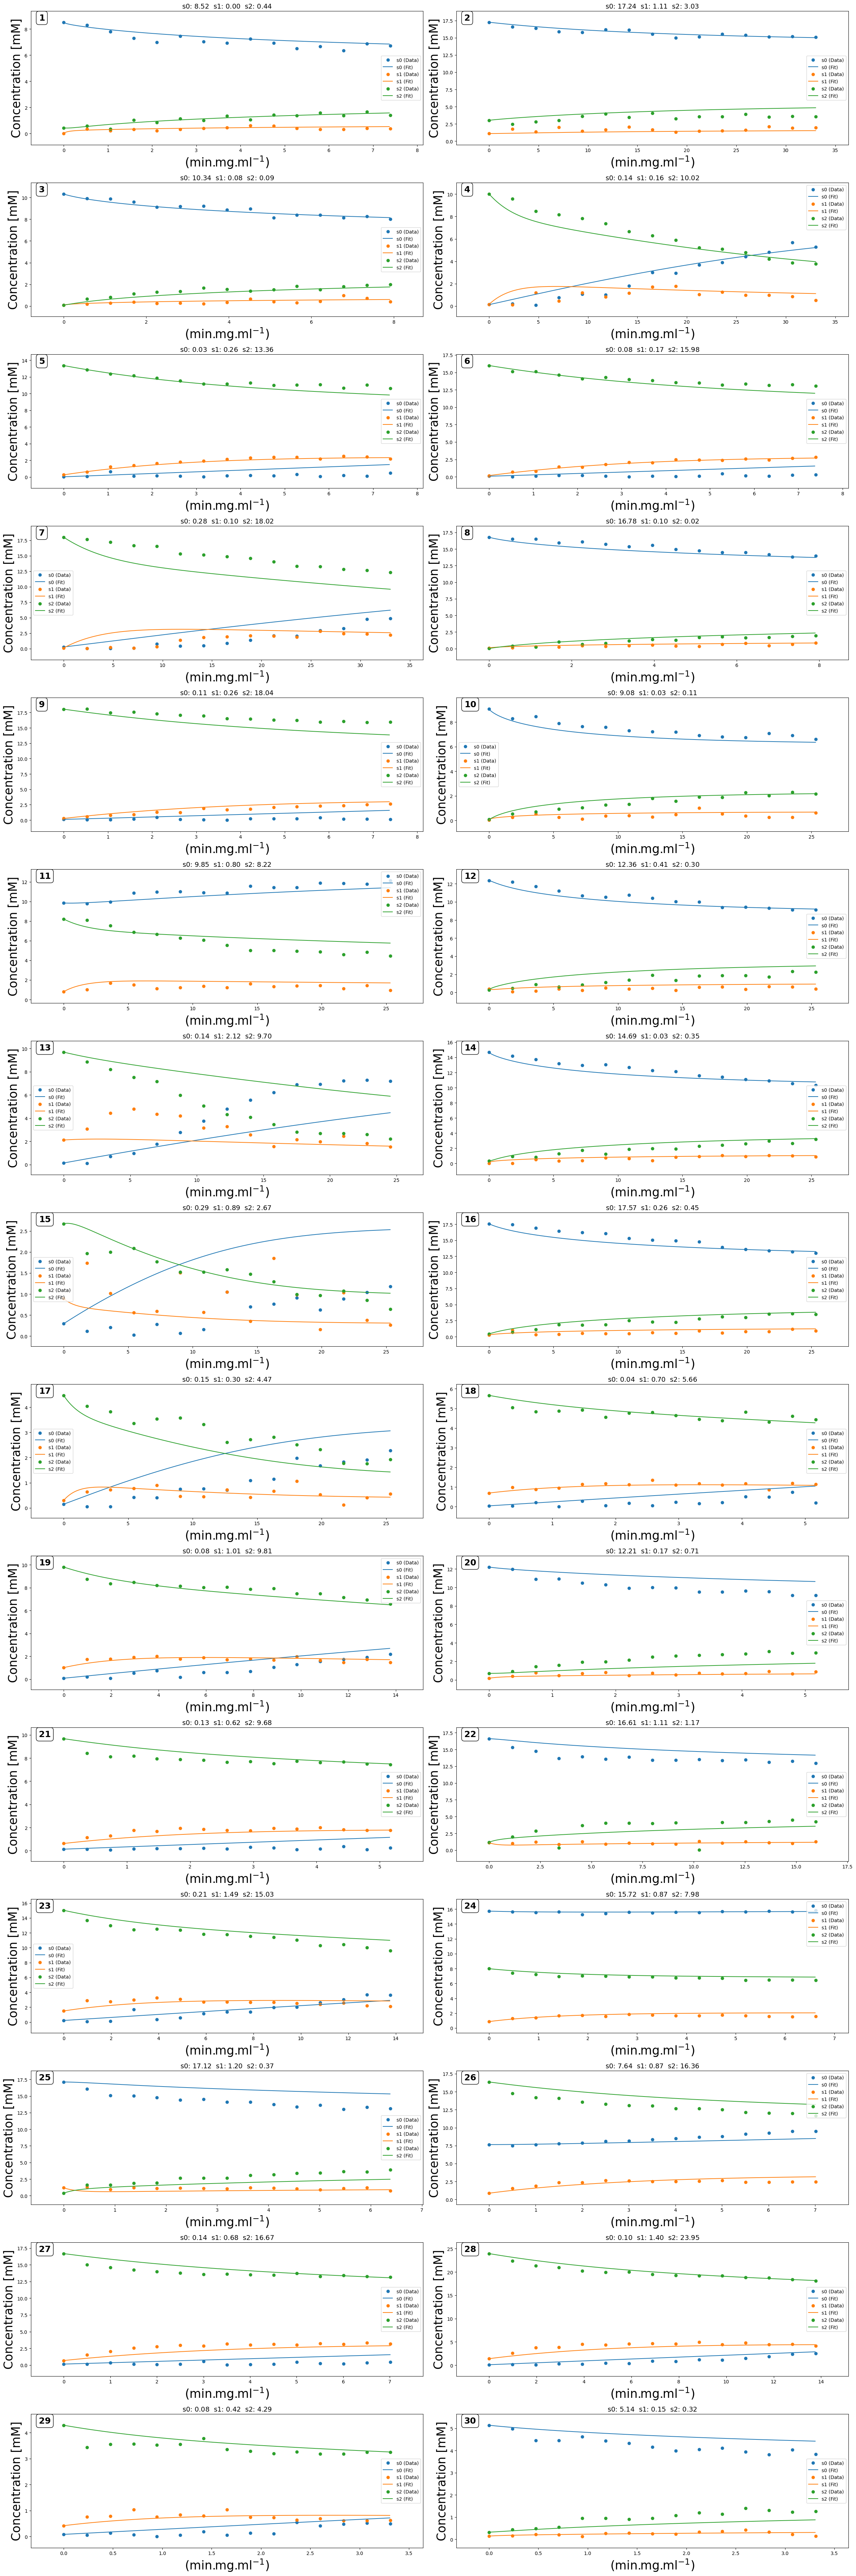

In [80]:
import matplotlib.pyplot as plt

# Number of axes
num_axes = len(loaded_figure.axes)

# Adjust the grid size (2 columns for larger plots)
cols = 2
rows = (num_axes // cols) + (num_axes % cols > 0)

# Create a larger figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(25, rows * 5))  # Adjusted figsize
axes = axes.flatten()  # Flatten to easily iterate over

# Iterate over the loaded axes and the new subplots
for i, (loaded_ax, new_ax) in enumerate(zip(loaded_figure.axes, axes)):
    # Initialize limits based only on the data points
    x_min, x_max = float('inf'), float('-inf')
    y_min, y_max = float('inf'), float('-inf')

    lower_bound = None
    upper_bound = None

    for line in loaded_ax.get_lines():
        label = line.get_label()
        x_data = line.get_xdata()
        y_data = line.get_ydata()

        if "Data" in label:
            # Scatter for data
            new_ax.scatter(x_data, y_data, label=label)
            x_min = min(x_min, min(x_data))
            x_max = max(x_max, max(x_data))
            y_min = min(y_min, min(y_data))
            y_max = max(y_max, max(y_data))
        elif "Fit" in label:
            # Trim the fit line to only the range of the data
            valid_fit = (x_data >= x_min) & (x_data <= x_max)
            new_ax.plot(x_data[valid_fit], y_data[valid_fit], label=label)
        elif "HDPI Lower" in label:
            lower_bound = y_data
        elif "HDPI Upper" in label:
            upper_bound = y_data

    # Plot HDPI band
    if lower_bound is not None and upper_bound is not None:
        new_ax.fill_between(
            x_data, lower_bound, upper_bound, color='blue', alpha=0.3, label="HDPI Band"
        )

    # Add subplot numbering in the top-left corner of each individual graph
    new_ax.text(
        0.02, 0.98, f"{i + 1}", transform=new_ax.transAxes, 
        fontsize=18, fontweight='bold', va='top', ha='left', 
        color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )

    # Set titles, labels, and legends
    new_ax.set_title(loaded_ax.get_title(), fontsize=14)
    new_ax.set_xlabel("(min.mg.ml$^{-1}$)", fontsize=25)  # Superscript for ^-1
    new_ax.set_ylabel("Concentration [mM]", fontsize=25)
    new_ax.legend(loc='best', fontsize=10)

    # Dynamically adjust x and y limits with a small margin
    margin_x = 0.1 * (x_max - x_min)
    margin_y = 0.1 * (y_max - y_min)
    new_ax.set_xlim(x_min - margin_x, x_max + margin_x)
    new_ax.set_ylim(y_min - margin_y, y_max + margin_y)

# Hide unused subplots
for ax in axes[num_axes:]:
    ax.axis('off')

# Adjust layout and spacing
plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust spacing between subplots

# Save the figure to a file
plt.tight_layout()
plt.savefig("Training Set 3 Visualization Val with HDPI.png", dpi=300, bbox_inches="tight")  # Save with specific name

# Show the figure
plt.show()
